<a href="https://colab.research.google.com/github/Lana211/NetworkProject/blob/master/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# phase 1

## Project Goal
The main goal of this project is to predict whether a patient is likely to experience a stroke based on health-related attributes such as age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, and smoking status.

In our project we will use two data mining tasks wich is classification , where the target variable is the stroke attribute (binary: 0 = no stroke, 1 = stroke). The classification model will be trained to be able to classify between patients who are at risk of stroke and those who are not, using the mentioned attributes as predictive features.

In addition, the dataset will also be used for a clustering task, where patients are grouped into clusters based on similar health characteristics (e.g., age, hypertension, heart disease, glucose level, and BMI). These clusters will help discover hidden patterns and can be further utilized to improve prediction and provide insights into patient health profiles.



## Data Set Discription
- Number of instances (rows): 5,111  
- Number of attributes (columns): 12  
 1) id: unique identifier--Nomnal
2) gender: "Male", "Female" --Binary
3) age: age of the patient-- Numric
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension-- Binary
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease-- Binary
6) ever_married: "No" or "Yes"--Baniry
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"--Nominal
8) Residence_type: "Rural" or "Urban"--Baniry
9) avg_glucose_level: average glucose level in blood-- Numric
10) bmi: body mass index-- Numric
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"--Nominal
12) (Class Label)stroke--Baniry  : 1 if the patient had a stroke or 0 if not
  - Values:  
    - 0 → No Stroke (4861 records)  
    - 1 → Stroke (249 records)  


## Data Source
- Source: Kaggle  
- Dataset: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)  
- Format: CSV file, compatible with Python (Pandas).

## Sample Of Raw Data

In [ ]:
import pandas as pd

df = pd.read_csv("Raw_DataSet.csv")

print("First 10 records:")
print(df.head(10))

print("\nDataset Info:")
print(df.info())



# phase 2

## import and reading data

### Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

### Reading Data

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## Data Analysis

### five number summary

In [ ]:
print("\nStatistical summaries (Numerical Attributes):")
print(df.describe())


Statistical summaries (Numerical Attributes):
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.00000

#### Five Number Summary Explanation:
The five number summary provides an overview of the numerical attributes in the dataset, showing important statistical measures for understanding data spread and distribution.  

- Age: The age values range from young to elderly patients, with a median around middle age, indicating a balanced dataset across age groups.  
- Average Glucose Level: The values vary widely, with some very high glucose levels, suggesting variability in patients’ health conditions.  
- BMI: The BMI column has fewer records (4909 instead of 5110), confirming the presence of missing data.

### detect outlier and boxplot

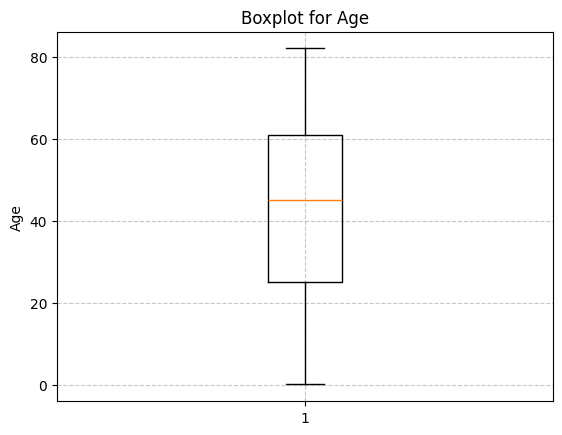

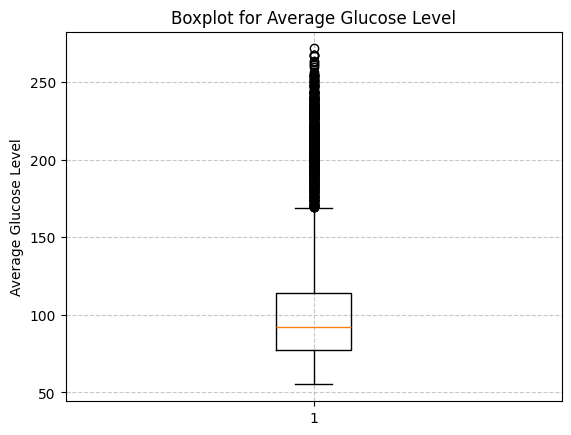

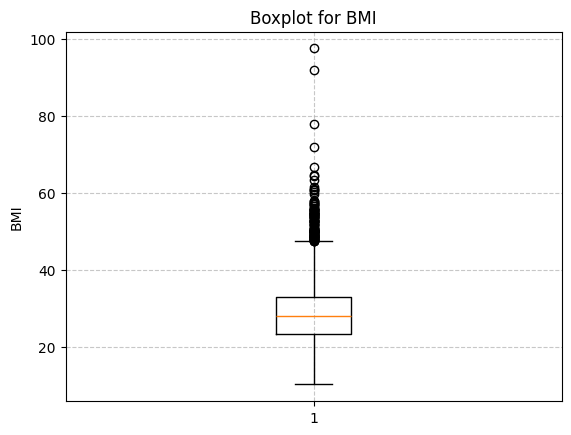

In [ ]:
plt.boxplot(df['age'])
plt.title('Boxplot for Age')
plt.ylabel('Age')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.boxplot(df['avg_glucose_level'])
plt.title('Boxplot for Average Glucose Level')
plt.ylabel('Average Glucose Level')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.boxplot(df['bmi'].dropna())
plt.title('Boxplot for BMI')
plt.ylabel('BMI')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### Boxplot Explanation:
The boxplots visualize the distribution and outliers for numerical features.  

- Age: The distribution is balanced between young and old patients, with no extreme outliers.  
- Average Glucose Level: There are several outliers above 200, indicating that some patients have unusually high glucose levels.  
- BMI: The BMI attribute shows multiple outliers above 50, which may represent data entry errors or exceptional cases.  

These outliers suggest that the dataset may require preprocessing to remove or adjust extreme values before modeling.  

### missing values


Missing values per column
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


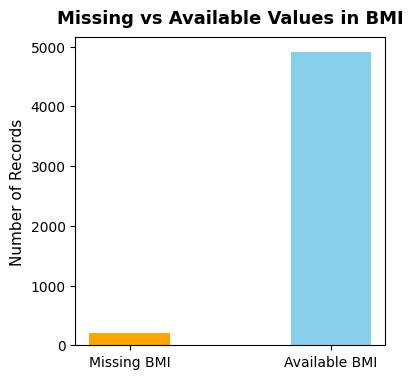

()

In [ ]:
num_of_missing_values= df.isnull().sum()
print("\nMissing values per column")
print(num_of_missing_values)
missing_bmi = df['bmi'].isnull().sum()
filled = len(df) - missing_bmi

data = {'Missing BMI': missing_bmi, 'Available BMI': filled}


plt.figure(figsize=(4,4))
plt.bar(data.keys(), data.values(), color=['orange', 'skyblue'], width=0.4)
plt.title('Missing vs Available Values in BMI', fontsize=13, fontweight='bold', pad=10)
plt.ylabel('Number of Records', fontsize=11)
plt.show()
()

####Missing Values Explanation:
The chart compares the missing and available values in the *BMI* column.  

- Observation: All attributes are complete except for *BMI*, which contains a small number of missing records.  
- Insight: Most records have valid BMI data, while a few are missing. This pattern shows that only one numerical feature is incomplete.  

This visualization confirmed that BMI requires missing-value handling (such as imputation) during preprocessing to ensure consistent data quality.  


### Plots

#### plot 1: scatterPlot (Age vs. BMI by Stroke)

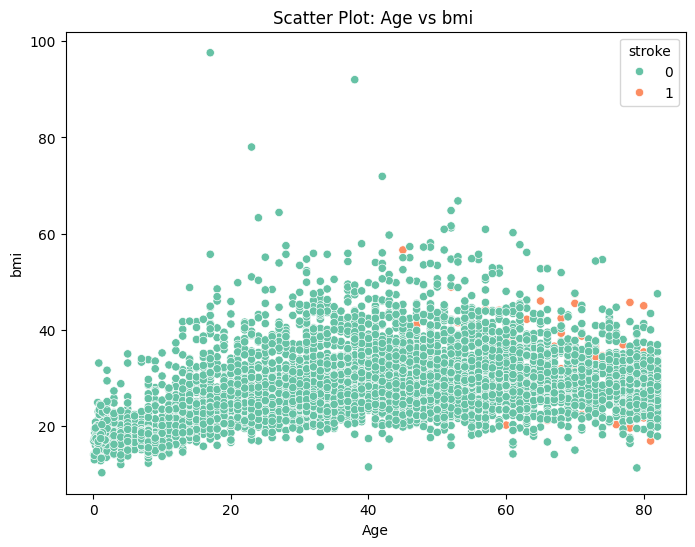

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(  x='age', y='bmi', data=df , hue='stroke',  palette='Set2')
plt.title("Scatter Plot: Age vs bmi ")
plt.xlabel("Age")
plt.ylabel("bmi")
plt.show()


Scatter Plot Explanation:
 - Stroke cases (1) appear more frequently among older ages.
 - BMI values are spread out with some very high outliers.
 - Most data points are concentrated between BMI 20–40 across different ages.

The plot shows that age is related to stroke occurrence, and BMI contains outliers that need preprocessing.

#### plot 2: Histograms (Age, BMI, and Average Glucose Level)

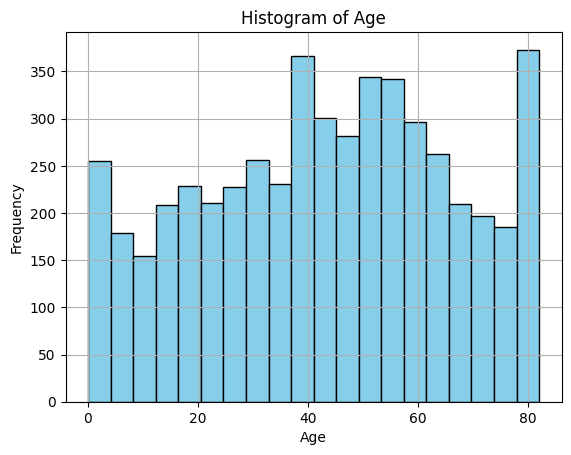

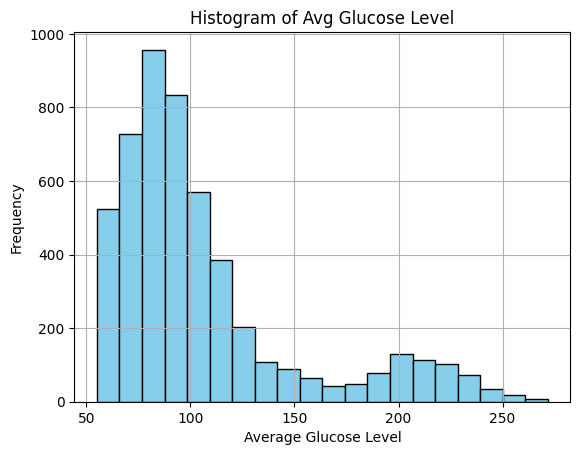

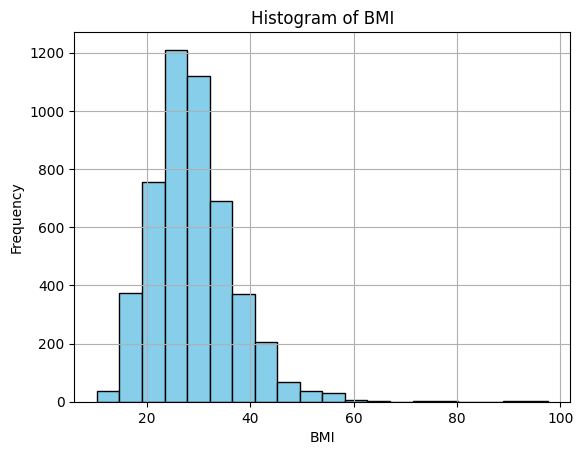

In [ ]:
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

df['avg_glucose_level'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Frequency")
plt.show()

df['bmi'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

Histogram Explanation:
 - Age: Most patients are adults, fewer young cases.
 - BMI: Some missing values.
 - Glucose: Skewed with high outliers.

The plots reveal missing values, skewness, and outliers that require preprocessing.

#### plot 3: Bar Plots (Gender, Residence Type, Work Type, Smoking Status, Ever Married)

/tmp/ipython-input-2725022515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette="Set2", edgecolor="black")


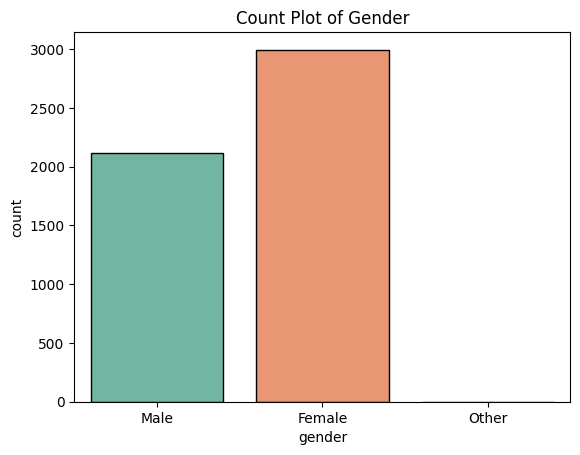

/tmp/ipython-input-2725022515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=df, palette="Set2", edgecolor="black")


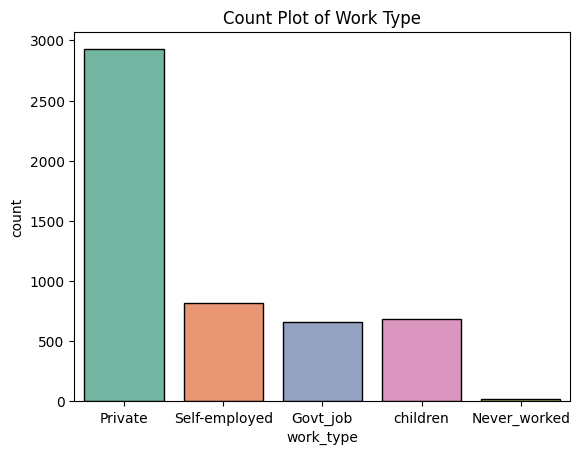

/tmp/ipython-input-2725022515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=df, palette="Set2", edgecolor="black")


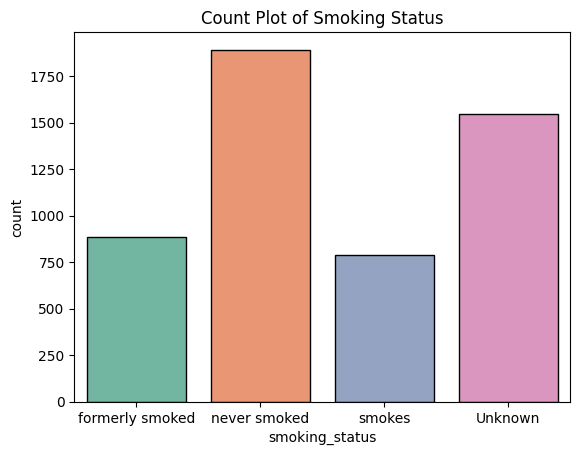

/tmp/ipython-input-2725022515.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Residence_type', data=df, palette="Set2", edgecolor="black")


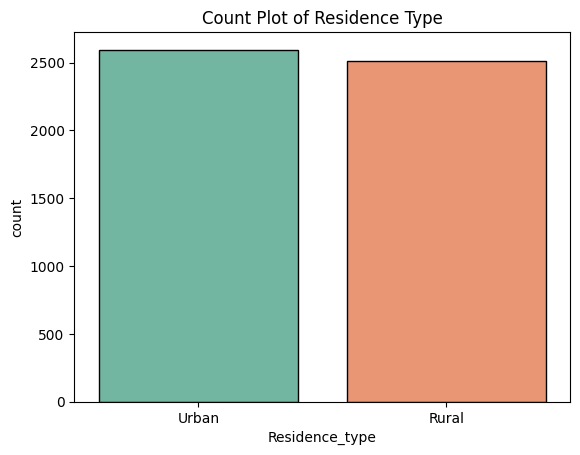

/tmp/ipython-input-2725022515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=df, palette="Set2", edgecolor="black")


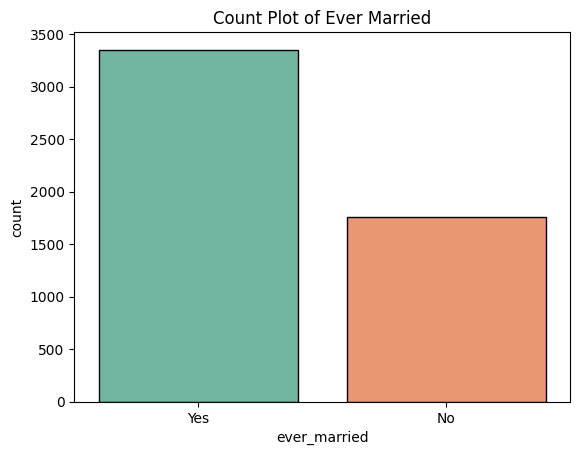

In [ ]:
sns.countplot(x='gender', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Gender")
plt.show()

sns.countplot(x='work_type', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Work Type")
plt.show()

sns.countplot(x='smoking_status', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Smoking Status")
plt.show()

sns.countplot(x='Residence_type', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Residence Type")
plt.show()

sns.countplot(x='ever_married', data=df, palette="Set2", edgecolor="black")
plt.title("Count Plot of Ever Married")
plt.show()

Bar Plot Explanation:
 - Gender: more female than males.
 - Residence: Urban and rural similar.
 - Work Type: Private is dominant.
 - Smoking: Includes “Unknown.”
 - Married: Majority are married.

The plots reveal categorical imbalance and missing/unknown values that need preprocessing.

### Class Label Distribution (Stroke) – Pie Chart

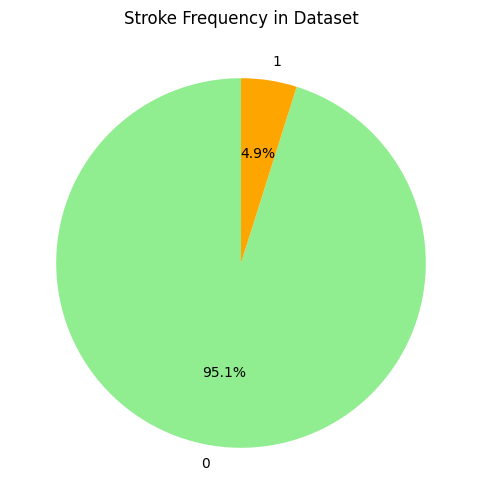

In [ ]:
stroke_freq = df['stroke'].value_counts(normalize=True) * 100

stroke_freq.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90,
                     colors=['lightgreen','orange'])

plt.title('Stroke Frequency in Dataset')
plt.ylabel('')
plt.show()

Class Label Explanation:
 - No Stroke (0): Majority.
 - Stroke (1): Very few.

 The plot shows severe class imbalance that must be addressed in preprocessing.

## Data Preprocessing

### Data Bafore Preprocessing

In [ ]:
df.head(15)

id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
13   8213    Male  78.0             0              1          Yes   
14   5317  Female  79.0             0              1          Yes   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
1   Self-employed          Rural             202.21   NaN     never smoked   
2         Private          Rural             105.92  32.5     never smoked   
3         Private          Urban             171.23  34.4           smokes   
4   Self-employed          Rural             174.12  24.0     never smoked   
5         Private          Urban             186.21  29.0  formerly smoked   
6         Private          Rural              70.09  27.4     never smoked   
7         Private          Urban              94.39  22.8     never smoked   
8         Private          Rural              76.15   NaN          Unknown   
9         Private          Urban              58.57  24.2          Unknown   
10        Private          Rural              80.43  29.7     never smoked   
11       Govt_job          Rural             120.46  36.8           smokes   
12        Private          Urban             104.51  27.3           smokes   
13        Private          Urban             219.84   NaN          Unknown   
14        Private          Urban             214.09  28.2     never smoked   

    stroke  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  
10       1  
11       1  
12       1  
13       1  
14       1

### Preprocessing Techniques

####Handling missing values

Checking for missing values:

In [ ]:
missing_values = df.isnull().sum()

print("Missing values in each attribute:\n")
print(missing_values)


Missing values in each attribute:

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We found 201 missing values in the BMI, which negatively affect the data mining process.


**Handling missing values:**

In [ ]:
df[['bmi']].head(15)

bmi
0   36.6
1    NaN
2   32.5
3   34.4
4   24.0
5   29.0
6   27.4
7   22.8
8    NaN
9   24.2
10  29.7
11  36.8
12  27.3
13   NaN
14  28.2

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)


/tmp/ipython-input-2494381813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(mean_bmi, inplace=True)


Data *after* handling missing value

In [ ]:
df[['bmi']].head(15)

bmi
0   36.600000
1   28.893237
2   32.500000
3   34.400000
4   24.000000
5   29.000000
6   27.400000
7   22.800000
8   28.893237
9   24.200000
10  29.700000
11  36.800000
12  27.300000
13  28.893237
14  28.200000

####Noise removal

Data before removing the outliers:

In [ ]:
df[['bmi','avg_glucose_level']].head(15)

bmi  avg_glucose_level
0   36.600000             228.69
1   28.893237             202.21
2   32.500000             105.92
3   34.400000             171.23
4   24.000000             174.12
5   29.000000             186.21
6   27.400000              70.09
7   22.800000              94.39
8   28.893237              76.15
9   24.200000              58.57
10  29.700000              80.43
11  36.800000             120.46
12  27.300000             104.51
13  28.893237             219.84
14  28.200000             214.09

**Handling Noies**

In [ ]:
Q1 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['age', 'avg_glucose_level', 'bmi']] < (Q1 - 1.5 * IQR)) |
          (df[['age', 'avg_glucose_level', 'bmi']] > (Q3 + 1.5 * IQR))).any(axis=1)]


Data After Noies Handling

In [ ]:
df[['bmi','avg_glucose_level']].head(15)

bmi  avg_glucose_level
2   32.500000             105.92
6   27.400000              70.09
7   22.800000              94.39
8   28.893237              76.15
9   24.200000              58.57
10  29.700000              80.43
11  36.800000             120.46
12  27.300000             104.51
15  30.900000             167.41
18  37.800000              89.22
24  27.200000             102.87
25  23.500000             104.12
26  28.200000             100.98
31  25.400000              83.41
34  29.700000              84.20


In the 'Average Glucose Level' and 'bmi' columns, we noticed there was an outliers, meaning a person’s average glucose level and bmi were far from the rest of the values in the column. Outliers have a big impact on analysis and modeling because they can distort the results. we decided to use the code to find the outliers and delete them, the data became more accurate.

#### Encoding Categorical Data

Data before the ُEncoding:

In [ ]:
df[['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']].head(15)

gender      work_type Residence_type   smoking_status ever_married
2     Male        Private          Rural     never smoked          Yes
6     Male        Private          Rural     never smoked          Yes
7   Female        Private          Urban     never smoked           No
8   Female        Private          Rural          Unknown          Yes
9   Female        Private          Urban          Unknown          Yes
10  Female        Private          Rural     never smoked          Yes
11  Female       Govt_job          Rural           smokes          Yes
12  Female        Private          Urban           smokes          Yes
15  Female  Self-employed          Rural     never smoked          Yes
18  Female        Private          Urban     never smoked           No
24    Male        Private          Urban  formerly smoked          Yes
25    Male  Self-employed          Rural     never smoked          Yes
26  Female        Private          Rural  formerly smoked          Yes
31    Male        Private          Rural          Unknown          Yes
34    Male       Govt_job          Urban     never smoked           No

In [ ]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])



Data After Encoding

In [ ]:
df[['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']].head(15)

gender  work_type  Residence_type  smoking_status  ever_married
2        1          2               0               2             1
6        1          2               0               2             1
7        0          2               1               2             0
8        0          2               0               0             1
9        0          2               1               0             1
10       0          2               0               2             1
11       0          0               0               3             1
12       0          2               1               3             1
15       0          3               0               2             1
18       0          2               1               2             0
24       1          2               1               1             1
25       1          3               0               2             1
26       0          2               0               1             1
31       1          2               0               0             1
34       1          0               1               2             0

we had categorical data in columns like ‘gender’, ‘work_type’, ‘Residence_type’, ‘smoking_status’, and ‘ever_married’, all containing text values (like ‘Male’ or ‘Female’ or ‘Married’). The problem is that statistical models can’t use text directly; the data needs to be numerical. So, I used LabelEncoder to convert the text values into numbers. After applying the code, the data became numeric and ready for use in models.


#### Discretization

Data Before Discretization

In [ ]:
df[['age', 'bmi', 'avg_glucose_level']].head(15)

age        bmi  avg_glucose_level
2   80.0  32.500000             105.92
6   74.0  27.400000              70.09
7   69.0  22.800000              94.39
8   59.0  28.893237              76.15
9   78.0  24.200000              58.57
10  81.0  29.700000              80.43
11  61.0  36.800000             120.46
12  54.0  27.300000             104.51
15  50.0  30.900000             167.41
18  60.0  37.800000              89.22
24  71.0  27.200000             102.87
25  80.0  23.500000             104.12
26  65.0  28.200000             100.98
31  42.0  25.400000              83.41
34  48.0  29.700000              84.20

In [ ]:
df['age'] = pd.cut(df['age'],
                   bins=[0, 30, 50, 100],
                   labels=['Young', 'Middle-aged', 'Senior'])

df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'],
                                 bins=[0, 100, 140, 300],
                                 labels=['Low', 'Normal', 'High'])

df['bmi'] = pd.cut(df['bmi'],
                   bins=[0, 18.5, 25, 30, 100],
                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

Data After Discretization

In [ ]:
df[[ 'age', 'avg_glucose_level', 'bmi']].head(15)


age avg_glucose_level         bmi
2        Senior            Normal       Obese
6        Senior               Low  Overweight
7        Senior               Low      Normal
8        Senior               Low  Overweight
9        Senior               Low      Normal
10       Senior               Low  Overweight
11       Senior            Normal       Obese
12       Senior            Normal  Overweight
15  Middle-aged              High       Obese
18       Senior               Low       Obese
24       Senior            Normal  Overweight
25       Senior            Normal      Normal
26       Senior            Normal  Overweight
31  Middle-aged               Low  Overweight
34  Middle-aged               Low  Overweight

We performed discretization on the dataset to improve the analysis and modeling results. Specifically, we transformed the following columns into categorical groups:

age → grouped into 'Young' (0–30), 'Middle-aged' (31–50), and 'Senior' (51–100).

avg_glucose_level → grouped into 'Low' (0–100), 'Normal' (101–140), and 'High' (141–300).

bmi → grouped into 'Underweight' (0–18.5), 'Normal' (18.6–25), 'Overweight' (25.1–30), and 'Obese' (30.1–100).

This process replaced the original numeric values with their corresponding categorical labels, helping to reduce noise and improve the performance and interpretability of our data mining models.

#### Remove irrelevant column (id)

In [ ]:
if 'id' in df.columns:
  df.drop('id', axis=1, inplace=True)
df.head(15)

gender          age  hypertension  heart_disease  ever_married  work_type  \
2        1       Senior             0              1             1          2   
6        1       Senior             1              1             1          2   
7        0       Senior             0              0             0          2   
8        0       Senior             0              0             1          2   
9        0       Senior             0              0             1          2   
10       0       Senior             1              0             1          2   
11       0       Senior             0              1             1          0   
12       0       Senior             0              0             1          2   
15       0  Middle-aged             1              0             1          3   
18       0       Senior             0              0             0          2   
24       1       Senior             0              0             1          2   
25       1       Senior             0              0             1          3   
26       0       Senior             0              0             1          2   
31       1  Middle-aged             0              0             1          2   
34       1  Middle-aged             0              0             0          0   

    Residence_type avg_glucose_level         bmi  smoking_status  stroke  
2                0            Normal       Obese               2       1  
6                0               Low  Overweight               2       1  
7                1               Low      Normal               2       1  
8                0               Low  Overweight               0       1  
9                1               Low      Normal               0       1  
10               0               Low  Overweight               2       1  
11               0            Normal       Obese               3       1  
12               1            Normal  Overweight               3       1  
15               0              High       Obese               2       1  
18               1               Low       Obese               2       1  
24               1            Normal  Overweight               1       1  
25               0            Normal      Normal               2       1  
26               0            Normal  Overweight               1       1  
31               0               Low  Overweight               0       1  
34               1               Low  Overweight               2       1

The ID column was used only to uniquely identify each record in the dataset. It doesn’t carry any predictive or analytical meaning related to stroke occurrence.
We removed it to prevent unnecessary noise and to make sure only relevant features are used during analysis and modeling.

####Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3512, 10), (879, 10))

We split the dataset into training and testing sets to evaluate how well the model performs on unseen data.
 we used an 80/20 split where 80% of the data is for training and 20% for testing.

####Data After Preprocessing

In [ ]:
df.head(15)

gender          age  hypertension  heart_disease  ever_married  work_type  \
2        1       Senior             0              1             1          2   
6        1       Senior             1              1             1          2   
7        0       Senior             0              0             0          2   
8        0       Senior             0              0             1          2   
9        0       Senior             0              0             1          2   
10       0       Senior             1              0             1          2   
11       0       Senior             0              1             1          0   
12       0       Senior             0              0             1          2   
15       0  Middle-aged             1              0             1          3   
18       0       Senior             0              0             0          2   
24       1       Senior             0              0             1          2   
25       1       Senior             0              0             1          3   
26       0       Senior             0              0             1          2   
31       1  Middle-aged             0              0             1          2   
34       1  Middle-aged             0              0             0          0   

    Residence_type avg_glucose_level         bmi  smoking_status  stroke  
2                0            Normal       Obese               2       1  
6                0               Low  Overweight               2       1  
7                1               Low      Normal               2       1  
8                0               Low  Overweight               0       1  
9                1               Low      Normal               0       1  
10               0               Low  Overweight               2       1  
11               0            Normal       Obese               3       1  
12               1            Normal  Overweight               3       1  
15               0              High       Obese               2       1  
18               1               Low       Obese               2       1  
24               1            Normal  Overweight               1       1  
25               0            Normal      Normal               2       1  
26               0            Normal  Overweight               1       1  
31               0               Low  Overweight               0       1  
34               1               Low  Overweight               2       1

In [ ]:
X = pd.get_dummies(X, columns=['age', 'avg_glucose_level', 'bmi'], drop_first=True)

## Saving data

# phase 3

## import and load data

In [ ]:
%pip install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from yellowbrick.cluster import SilhouetteVisualizer



In [ ]:
df=pd.read_csv('processed_data (3).csv')
df.shape
df.head()

gender     age  hypertension  heart_disease ever_married work_type  \
0    Male  Senior             0              1          Yes   Private   
1    Male  Senior             1              1          Yes   Private   
2  Female  Senior             0              0           No   Private   
3  Female  Senior             0              0          Yes   Private   
4  Female  Senior             0              0          Yes   Private   

  Residence_type avg_glucose_level         bmi smoking_status  stroke  
0          Rural            Normal       Obese   never smoked       1  
1          Rural               Low  Overweight   never smoked       1  
2          Urban               Low      Normal   never smoked       1  
3          Rural               Low  Overweight        Unknown       1  
4          Urban               Low      Normal        Unknown       1

##Encoding

In [ ]:
encoder = LabelEncoder()
df['age'] = encoder.fit_transform(df['age'])
df['avg_glucose_level'] = encoder.fit_transform(df['avg_glucose_level'])
df['bmi'] = encoder.fit_transform(df['bmi'])
df['gender'] = encoder.fit_transform(df['gender'])

df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])

print("\nEncoded Data Sample:")
print(df[['gender','age','avg_glucose_level','bmi', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']].head())


Encoded Data Sample:
   gender  age  avg_glucose_level  bmi  work_type  Residence_type  \
0       1    1                  2    1          2               0   
1       1    1                  1    2          2               0   
2       0    1                  1    0          2               1   
3       0    1                  1    2          2               0   
4       0    1                  1    0          2               1   

   smoking_status  ever_married  
0               2             1  
1               2             1  
2               2             0  
3               0             1  
4               0             1  


## Data Balancing

In [ ]:
print("Before Balancing:")
print(df['stroke'].value_counts())
print(f"\nClass 0 (No Stroke): {df['stroke'].value_counts()[0]} samples")
print(f"Class 1 (Stroke): {df['stroke'].value_counts()[1]} samples")
print(f"Imbalance Ratio: {df['stroke'].value_counts()[0] / df['stroke'].value_counts()[1]:.2f}:1")

X_before_balance = df.drop('stroke', axis=1)
y_before_balance = df['stroke']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_before_balance, y_before_balance)

print("After Balancing (SMOTE):")
print(pd.Series(y_balanced).value_counts())
print(f"\nClass 0 (No Stroke): {pd.Series(y_balanced).value_counts()[0]} samples")
print(f"Class 1 (Stroke): {pd.Series(y_balanced).value_counts()[1]} samples")
print(f"Total samples after balancing: {len(y_balanced)}")

df = pd.DataFrame(X_balanced, columns=X_before_balance.columns)
df['stroke'] = y_balanced

Before Balancing:
stroke
0    4226
1     165
Name: count, dtype: int64

Class 0 (No Stroke): 4226 samples
Class 1 (Stroke): 165 samples
Imbalance Ratio: 25.61:1
After Balancing (SMOTE):
stroke
1    4226
0    4226
Name: count, dtype: int64

Class 0 (No Stroke): 4226 samples
Class 1 (Stroke): 4226 samples
Total samples after balancing: 8452


### **The Problem:**
When we built our classification models (Decision Trees with Gini and Entropy), all models failed. We couldn't compare between different splits (90/10, 80/20, 70/30) or techniques because the results were unreliable. We discovered the dataset was highly imbalanced from the start.
The model just learned to say "No Stroke" for almost everything to get high accuracy numbers, but it failed at detecting actual stroke cases . This made all our comparisons meaningless.

## classification

### GINI

In [ ]:
fn = df.keys().tolist()[:-1]
X = df[fn]
y = df.iloc[:, -1]




#### 90% training / 10% testing

##### Splitting Data

In [ ]:
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print(f"Training set size: {len(X_train_90)} samples")
print(f"Testing set size: {len(X_test_10)} samples\n")

Training set size: 7606 samples
Testing set size: 846 samples



The random_state=42 ensures this split is reproducible.

##### Building Decision Tree Model

In [ ]:
clf_gini_90_10 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf_gini_90_10 = clf_gini_90_10.fit(X_train_90, y_train_90)

#####  Predict

In [ ]:
y_pred_90_10 = clf_gini_90_10.predict(X_test_10)


##### Evaluate

In [ ]:
accuracy_90_10 = metrics.accuracy_score(y_test_10, y_pred_90_10)
print(f"Accuracy: {accuracy_90_10:.4f}")
print(f"Accuracy: {accuracy_90_10*100:.2f}")

Accuracy: 0.7908
Accuracy: 79.08


An accuracy of 79.08% means the model made the correct prediction (for both "Stroke" and "No Stroke") on 78.49% of the patients in the test set.

##### Confusion Matrix

In [ ]:
cm_90_10 = confusion_matrix(y_test_10, y_pred_90_10)
print("Confusion Matrix:")
print(cm_90_10)
print()

Confusion Matrix:
[[280 127]
 [ 50 389]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

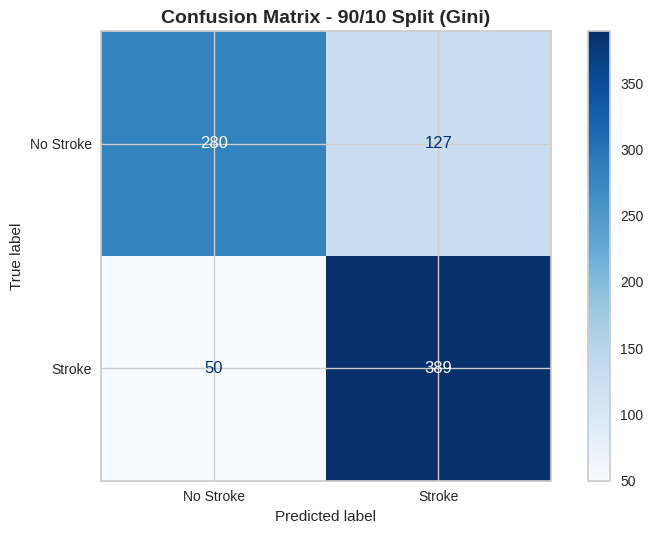

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_90_10, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 90/10 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

True Negatives (TN): 280 - The model correctly predicted "No Stroke" for 276 patients.

False Positives (FP): 127 - The model incorrectly predicted "Stroke" for 131 patients who did not have one. (This is a "False Alarm").

False Negatives (FN): 50 - The model incorrectly predicted "No Stroke" for 51 patients who did have a stroke. (This is the most dangerous error).

True Positives (TP): 389- The model correctly predicted "Stroke" for 388 patients.

The model is better at identifying strokes than avoiding false alarms. It has a high number of True Positives (389).

The most critical error is the 51 False Negatives. In a medical context, missing 51 potential stroke cases is a significant concern.

There are many False Positives (127). This means the model is somewhat "cautious," often predicting a stroke when there isn't one. This might be acceptable if the goal is to catch as many real strokes as possible, even if it means more false alarms.

#####  Visualize Decision Tree

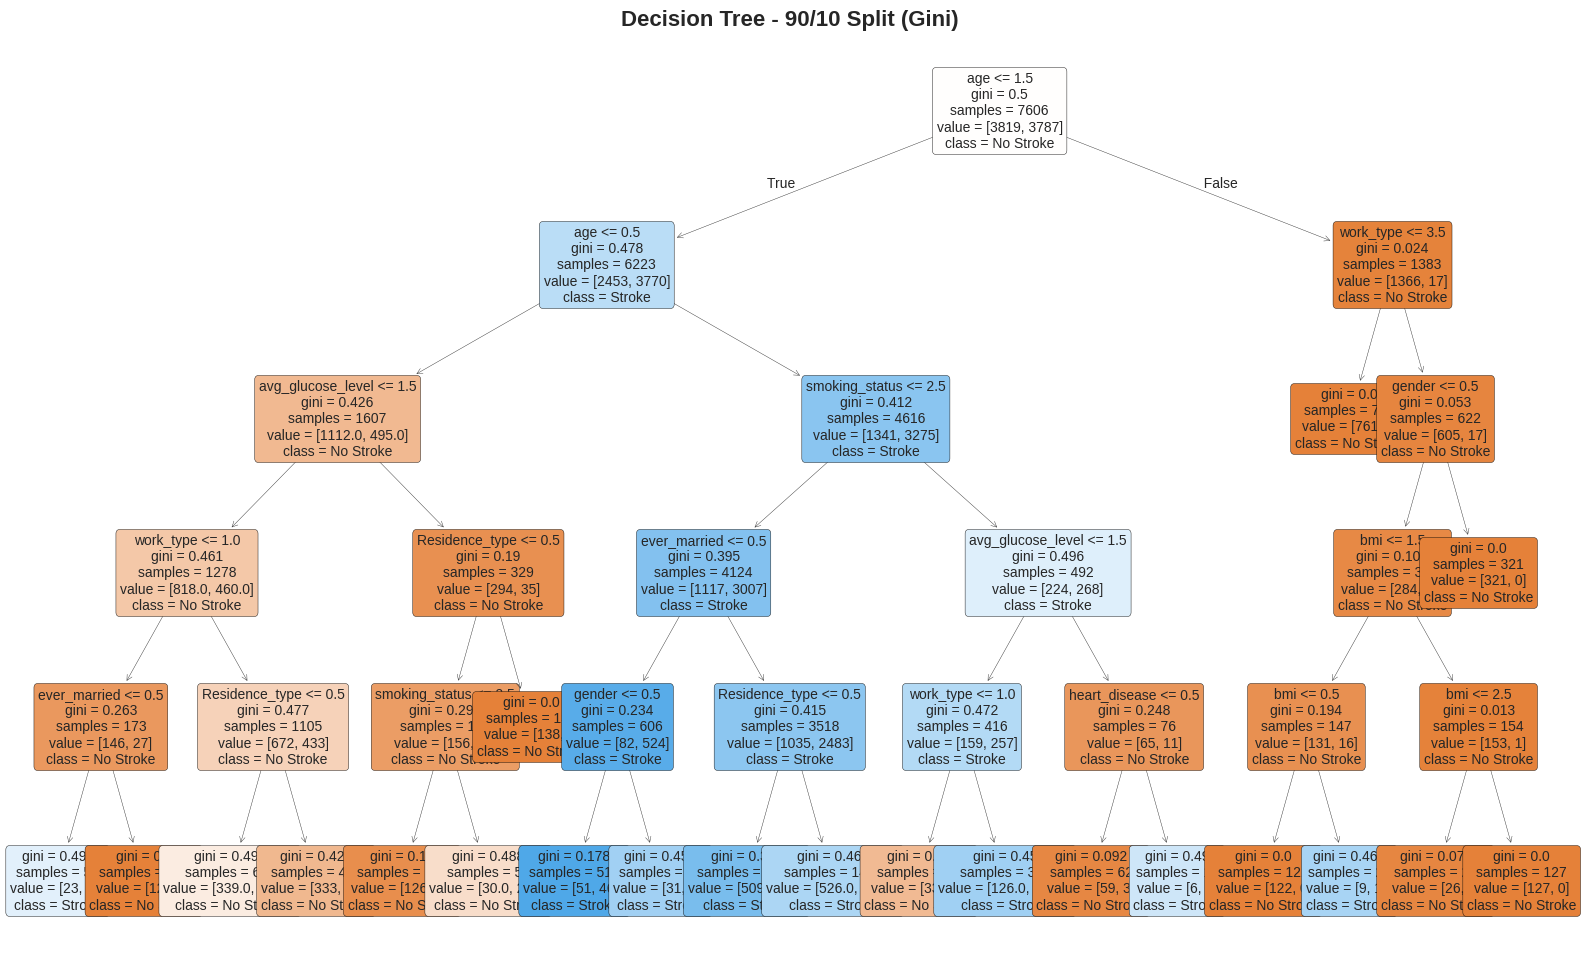

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_gini_90_10,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 90/10 Split (Gini)', fontsize=16, fontweight='bold')
plt.savefig('dt_90_10_gini.png', dpi=300, bbox_inches='tight')
plt.show()

Root Node: The first split is on age <= 0.5. This immediately tells us that age is the most important feature in the model's decision-making process for this dataset.

Key Features: Other important features used in the tree's splits include avg_glucose_level, hypertension, and bmi. This aligns with medical knowledge about stroke risk factors.

Preventing Overfitting: The max_depth=5 parameter created a relatively simple and interpretable tree.

#### 80% training / 20% testing

##### Splitting Data

In [ ]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train_80)} samples")
print(f"Testing set size: {len(X_test_20)} samples\n")


Training set size: 6761 samples
Testing set size: 1691 samples



##### Building Decision Tree Model

In [ ]:
clf_gini_80_20 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf_gini_80_20.fit(X_train_80, y_train_80)

DecisionTreeClassifier(max_depth=5, random_state=42)

#####  Predict

In [ ]:
y_pred_80_20 = clf_gini_80_20.predict(X_test_20)


##### Evaluate

In [ ]:
accuracy_80_20 = metrics.accuracy_score(y_test_20, y_pred_80_20)
print(f"Accuracy: {accuracy_80_20:.4f}")
print(f"Accuracy: {accuracy_80_20*100:.2f}%\n")

Accuracy: 0.7942
Accuracy: 79.42%



The accuracy is almost identical to the previous model (79.08% vs 79.42%). This small difference is normal and shows that the model's performance is consistent across different data splits, which is a good sign.

##### Confusion Matrix

In [ ]:
cm_80_20 = confusion_matrix(y_test_20, y_pred_80_20)
print("Confusion Matrix:")
print(cm_80_20)
print()

Confusion Matrix:
[[578 255]
 [ 93 765]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

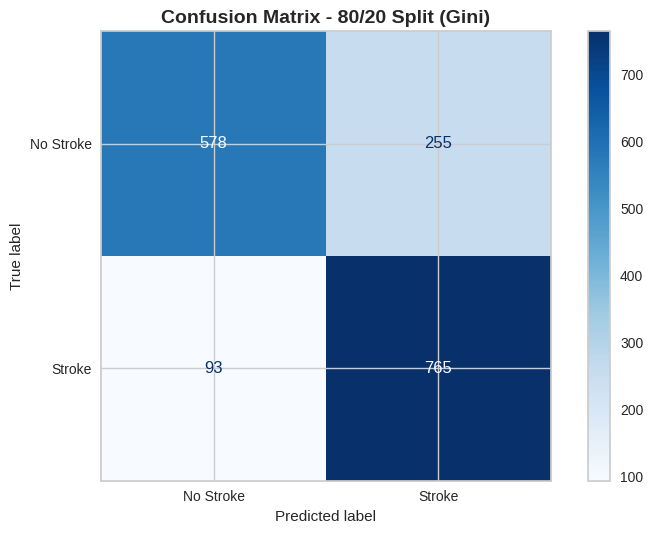

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_80_20, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 80/20 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


True Negatives (TN): 578 - Correctly predicted "No Stroke".

False Positives (FP): 255 - Incorrectly predicted "Stroke" for patients without one (False Alarms).

False Negatives (FN): 93 - Incorrectly predicted "No Stroke" for patients who had a stroke (Missed Strokes).

True Positives (TP): 765 - Correctly predicted "Stroke".v

The 80-20 model caught more strokes (765 vs 389) but also missed more strokes (138 vs 51). This is expected because the test set is larger.

The pattern of performance is the same: the model is reasonably good but has significant errors in both directions, with the False Negatives being the most critical.

#####  Visualize Decision Tree

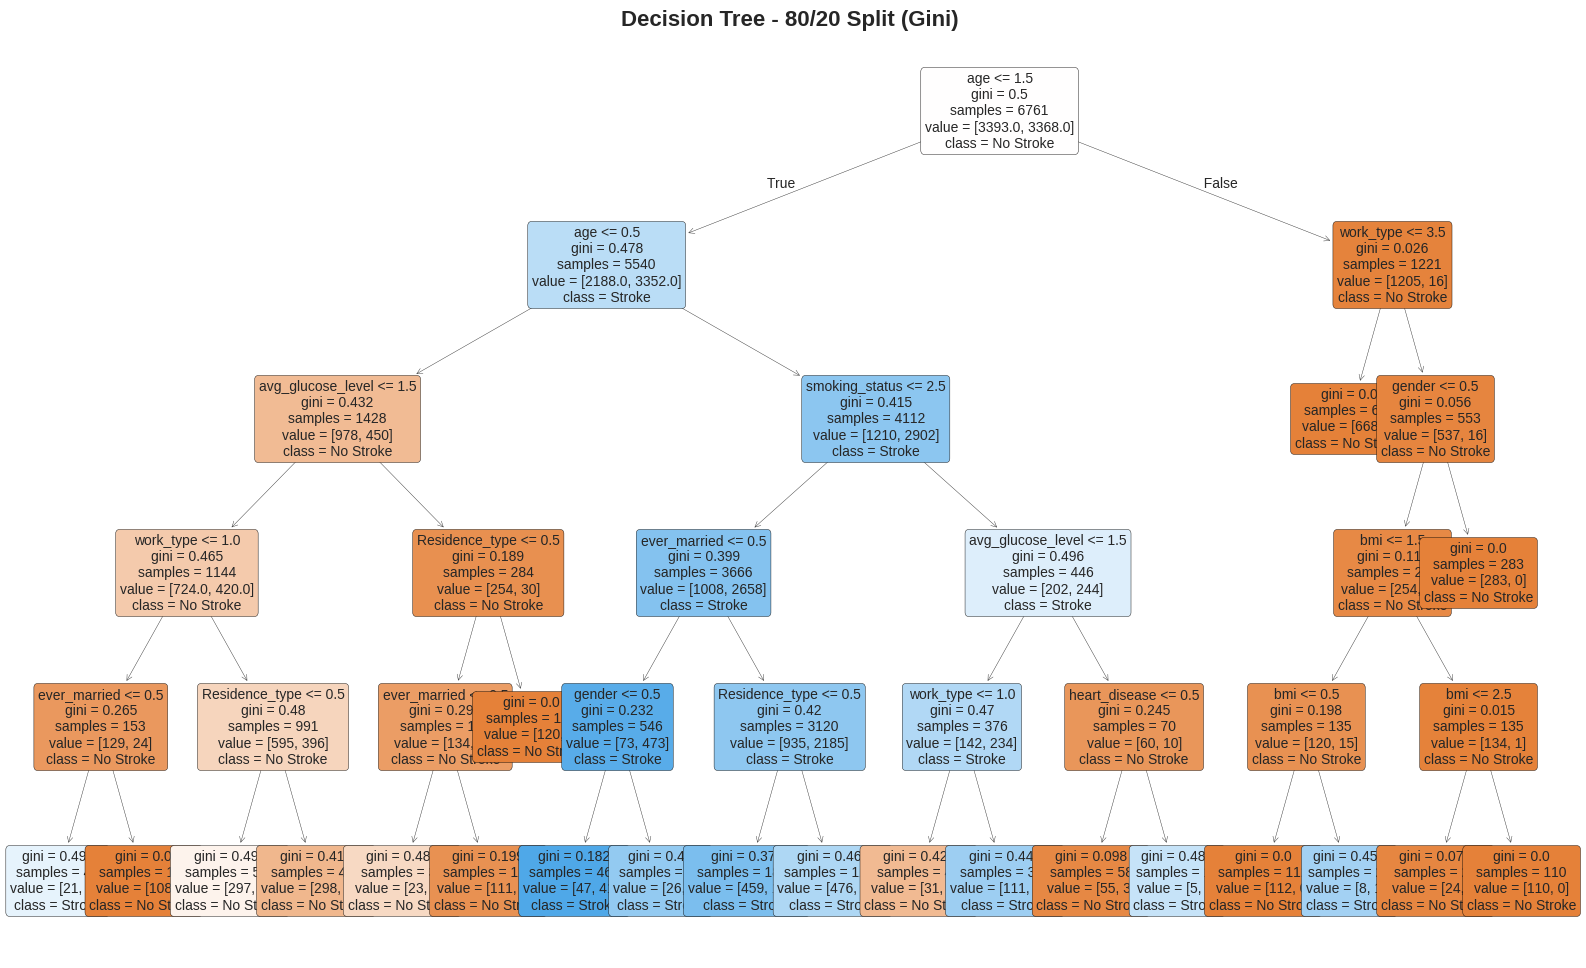

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_gini_80_20,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 80/20 Split (Gini)', fontsize=16, fontweight='bold')
plt.savefig('dt_80_20_gini.png', dpi=300, bbox_inches='tight')
plt.show()

avg_glucose_level: Used early in the tree, indicating it's a very important risk factor.

hypertension: Another critical medical condition for stroke prediction.

bmi: Body Mass Index is used in multiple branches.

heart_disease: A known major risk factor for stroke.

gender and smoking_status: Also used by the model to refine its predictions.

#### 70% training / 30% testing

##### Splitting Data

In [ ]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set size: {len(X_train_70)} samples")
print(f"Testing set size: {len(X_test_30)} samples\n")


Training set size: 5916 samples
Testing set size: 2536 samples



This split uses an even larger portion (30%) of the data for testing compared to the previous splits. This provides the most robust evaluation so far, as the model's performance is measured on the largest sample of unseen data.

##### Building Decision Tree Model

In [ ]:
clf_gini_70_30 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf_gini_70_30.fit(X_train_70, y_train_70)


DecisionTreeClassifier(max_depth=5, random_state=42)

#####  Predict

In [ ]:
y_pred_70_30 = clf_gini_70_30.predict(X_test_30)



##### Evaluate

In [ ]:
accuracy_70_30 = metrics.accuracy_score(y_test_30, y_pred_70_30)
print(f"Accuracy: {accuracy_70_30:.4f}")
print(f"Accuracy: {accuracy_70_30*100:.2f}")

Accuracy: 0.7800
Accuracy: 78.00


The accuracy is very consistent with previous splits (79.42%, 79.08%, and now 78.00%). This small variation confirms that the model's performance is stable and reliable across different data samples.

This seems high at first glance
  The model is excellent at predicting "No Stroke" but fails completely at predicting "Stroke" cases

##### Confusion Matrix

In [ ]:
cm_70_30 = confusion_matrix(y_test_30, y_pred_70_30)
print("Confusion Matrix:")
print(cm_70_30)
print()

Confusion Matrix:
[[ 883  387]
 [ 171 1095]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

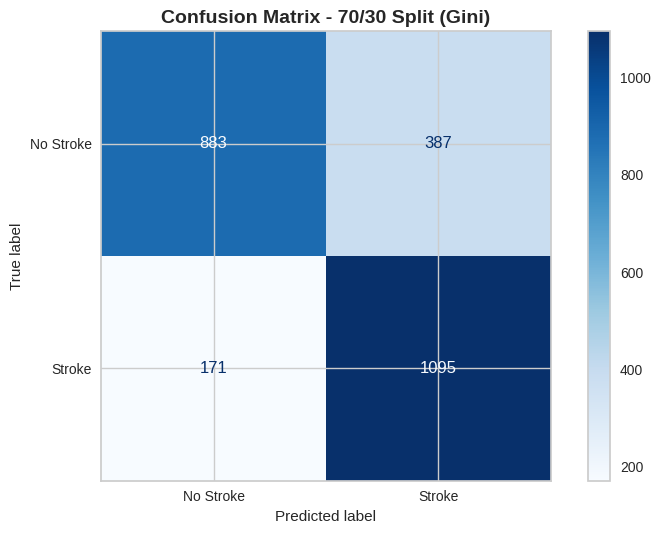

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_70_30, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 70/30 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

True Negatives (TN): 883 - Correctly predicted "No Stroke".

False Positives (FP): 387- Incorrect "Stroke" predictions (False Alarms).

False Negatives (FN): 171 - Incorrect "No Stroke" predictions (Missed Strokes).

True Positives (TP): 1095 - Correctly predicted "Stroke".

The model has 171 False Negatives it missed 387 patients who actually had strokes. This is the most serious type of error in medical prediction.

High False Positives continue: With 387 False Positives, the model continues to be "cautious," often predicting stroke when there isn't one.



#####  Visualize Decision Tree

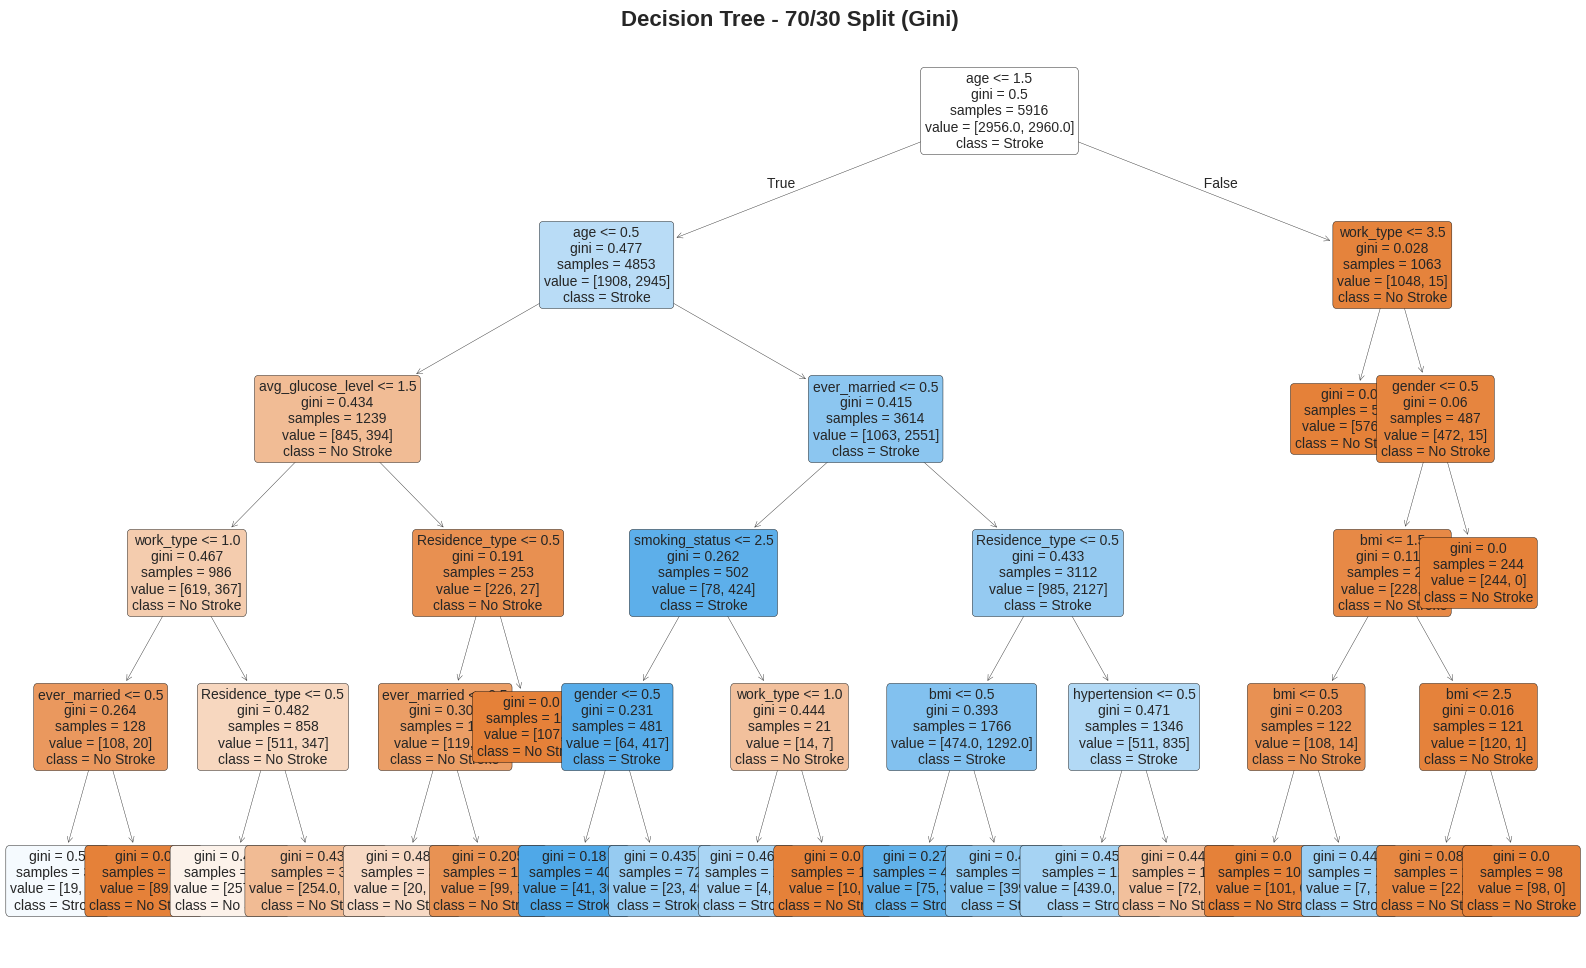

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_gini_70_30,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 70/30 Split (Gini)', fontsize=16, fontweight='bold')
plt.savefig('dt_70_30_gini.png', dpi=300, bbox_inches='tight')
plt.show()

avg_glucose_level: Second major split after age

ever_married: Interestingly prominent in this tree

hypertension: Critical medical condition

bmi, gender, smoking_status: Used for refining predictions



##### COMPARISON TABLE

In [ ]:
results_df = pd.DataFrame({
    'Split': ['90-10', '80-20', '70-30'],
    'Accuracy': [
        f"{accuracy_90_10:.4f}",
        f"{accuracy_80_20:.4f}",
        f"{accuracy_70_30:.4f}"
    ],
    'Accuracy %': [
        f"{accuracy_90_10*100:.2f}%",
        f"{accuracy_80_20*100:.2f}%",
        f"{accuracy_70_30*100:.2f}%"
    ]
})

print(results_df.to_string(index=False))

Split Accuracy Accuracy %
90-10   0.7908     79.08%
80-20   0.7942     79.42%
70-30   0.7800     78.00%


#####Visualization

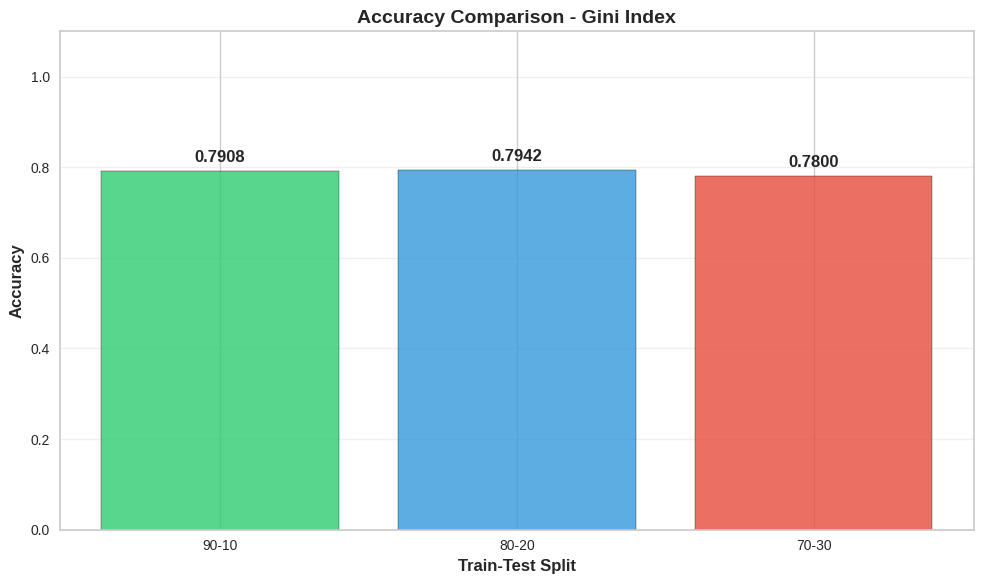

In [ ]:
plt.figure(figsize=(10, 6))
splits = ['90-10', '80-20', '70-30']
accuracies = [accuracy_90_10, accuracy_80_20, accuracy_70_30]

plt.bar(splits, accuracies, color=['#2ecc71', '#3498db', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.xlabel('Train-Test Split', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy Comparison - Gini Index', fontsize=14, fontweight='bold')
plt.ylim([0, 1.1])

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('accuracy_comparison_gini.png', dpi=300, bbox_inches='tight')
plt.show()


Remarkable Consistency: All three train-test splits (90-10, 80-20, 70-30) show nearly identical accuracy (78-79%), proving the model is stable and reliable.

Pattern Confirmation: The confusion matrices across all splits reveal the exact same pattern:

Good at identifying strokes (high True Positives)

Too many false alarms (high False Positives)

Dangerous number of missed strokes (high False Negatives)

##### Feature Preparation

In [ ]:
fn = df.keys().tolist()[:-1]
X = df[fn]
y = df.iloc[:, -1]


categorical_cols = X.select_dtypes(include=['object']).columns


X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
df.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1    1             0              1             1          2   
1       1    1             1              1             1          2   
2       0    1             0              0             0          2   
3       0    1             0              0             1          2   
4       0    1             0              0             1          2   

   Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               0                  2    1               2       1  
1               0                  1    2               2       1  
2               1                  1    0               2       1  
3               0                  1    2               0       1  
4               1                  1    0               0       1

### Entropy

####90% training / 10% testing

##### Splitting Data

In [ ]:
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print(f"Training set size: {len(X_train_90)} samples")
print(f"Testing set size: {len(X_test_10)} samples\n")

Training set size: 7606 samples
Testing set size: 846 samples



##### Building Decision Tree Model

In [ ]:
clf_entropy_90_10 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf_entropy_90_10 = clf_entropy_90_10.fit(X_train_90, y_train_90)

#####  Predict

In [ ]:
y_pred_90_10 = clf_entropy_90_10.predict(X_test_10)


##### Evaluate

In [ ]:
accuracy_90_10 = metrics.accuracy_score(y_test_10, y_pred_90_10)
print(f"Accuracy: {accuracy_90_10:.4f}")
print(f"Accuracy: {accuracy_90_10*100:.2f}%\n")

Accuracy: 0.7920
Accuracy: 79.20%



This is extremely similar to the Gini model (79.08%).

##### Confusion Matrix

In [ ]:
cm_entropy_90_10 = confusion_matrix(y_test_10, y_pred_90_10)
print("Confusion Matrix:")
print(cm_entropy_90_10)
print()

Confusion Matrix:
[[282 125]
 [ 51 388]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

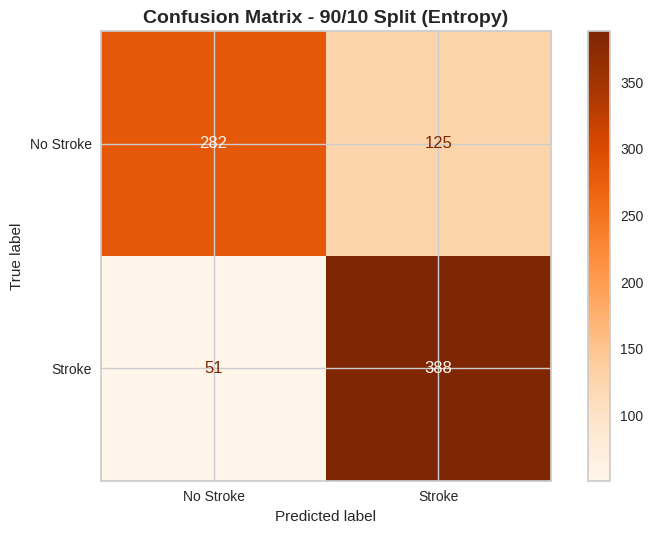

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_90_10, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 90/10 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

True Negatives (TN): 282 - Correct "No Stroke" predictions

False Positives (FP): 125 - False alarms

False Negatives (FN): 51 - Missed strokes

True Positives (TP): 388 - Correct stroke predictions

Entropy caught 1 fewer strokes (388 vs 389)

But Entropy missed 1 more strokes (51 vs 50)

Entropy has 2 fewer false alarms (125vs 127)

Both models have the same fundamental problem: significant False Negatives (missed strokes)

##### Visualize Decision Tree

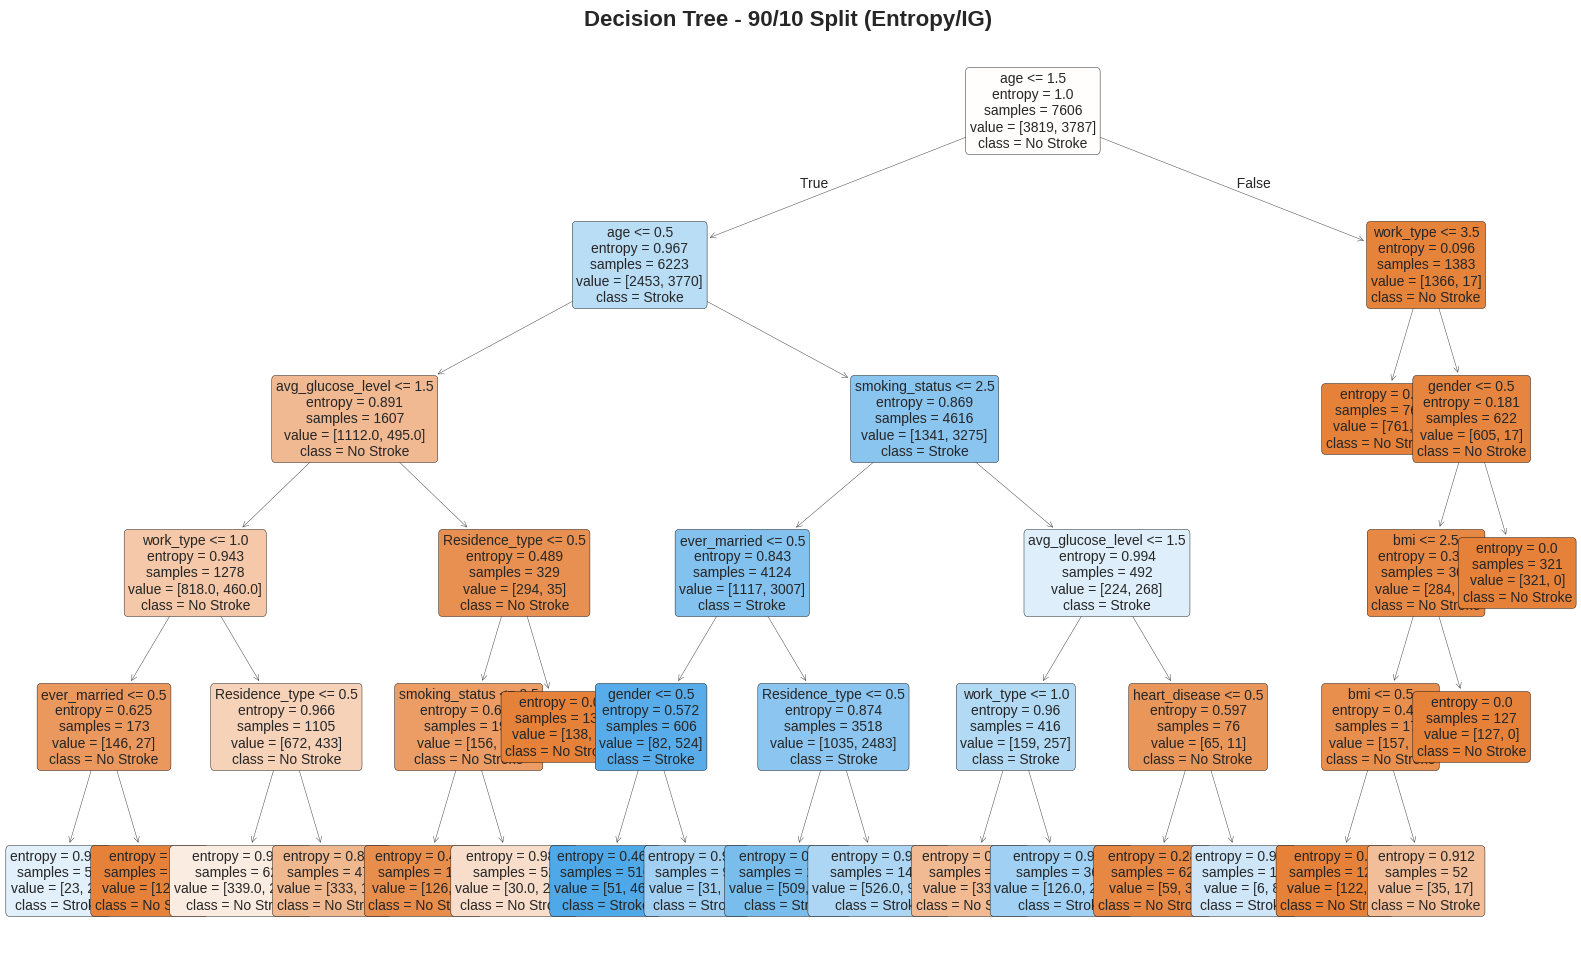

✓ Split 1 (90-10) with Entropy completed!



In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_entropy_90_10,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 90/10 Split (Entropy/IG)', fontsize=16, fontweight='bold')
plt.savefig('dt_90_10_entropy.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Split 1 (90-10) with Entropy completed!\n")

age (primary splitter)

work_type and working_status (appear more prominently than in Gini trees)

hypertension, bmi, gender, cluster (consistent medical factors)

####80% training / 20% testing

##### Splitting Data

In [ ]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {len(X_train_80)} samples")
print(f"Testing set size: {len(X_test_20)} samples\n")

Training set size: 6761 samples
Testing set size: 1691 samples



##### Building Decision Tree Model

In [ ]:
clf_entropy_80_20 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf_entropy_80_20 = clf_entropy_80_20.fit(X_train_80, y_train_80)

#####  Predict

In [ ]:
y_pred_80_20 = clf_entropy_80_20.predict(X_test_20)

##### Evaluate

In [ ]:
accuracy_80_20 = metrics.accuracy_score(y_test_20, y_pred_80_20)
print(f"Accuracy: {accuracy_80_20:.4f}")
print(f"Accuracy: {accuracy_80_20*100:.2f}%\n")

Accuracy: 0.7924
Accuracy: 79.24%



his is very consistent with both:

Gini 80-20 model: 79.42%

Entropy 90-10 model: 79.24%

##### Confusion Matrix

In [ ]:
cm_entropy_80_20 = confusion_matrix(y_test_20, y_pred_80_20)
print("Confusion Matrix:")
print(cm_entropy_80_20)
print()


Confusion Matrix:
[[573 260]
 [ 91 767]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

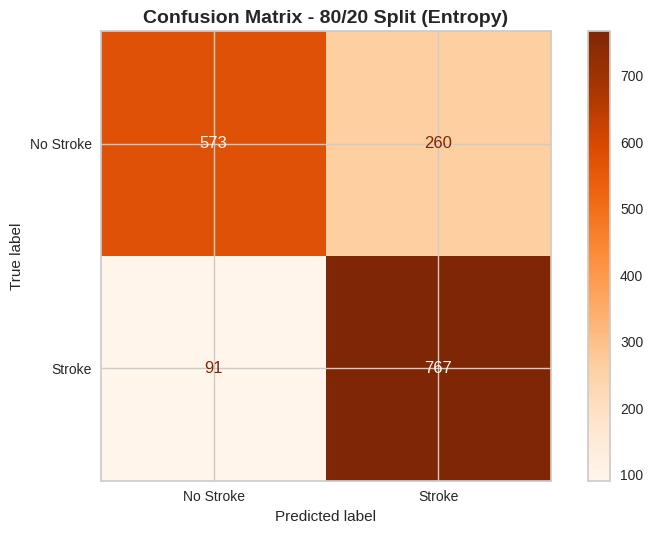

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_80_20, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 80/20 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

True Negatives (TN): 573 - Correct "No Stroke" predictions

False Positives (FP): 260 - False alarms

False Negatives (FN): 91 - Missed strokes

True Positives (TP): 767 - Correct stroke predictions

Nearly identical performance: Only 1-patient difference in stroke predictions

Nearly identical performance: Only 2-patient difference in non-stroke predictions

Same error patterns: Both suffer from the same 138 missed strokes

##### Visualize Decision Tree

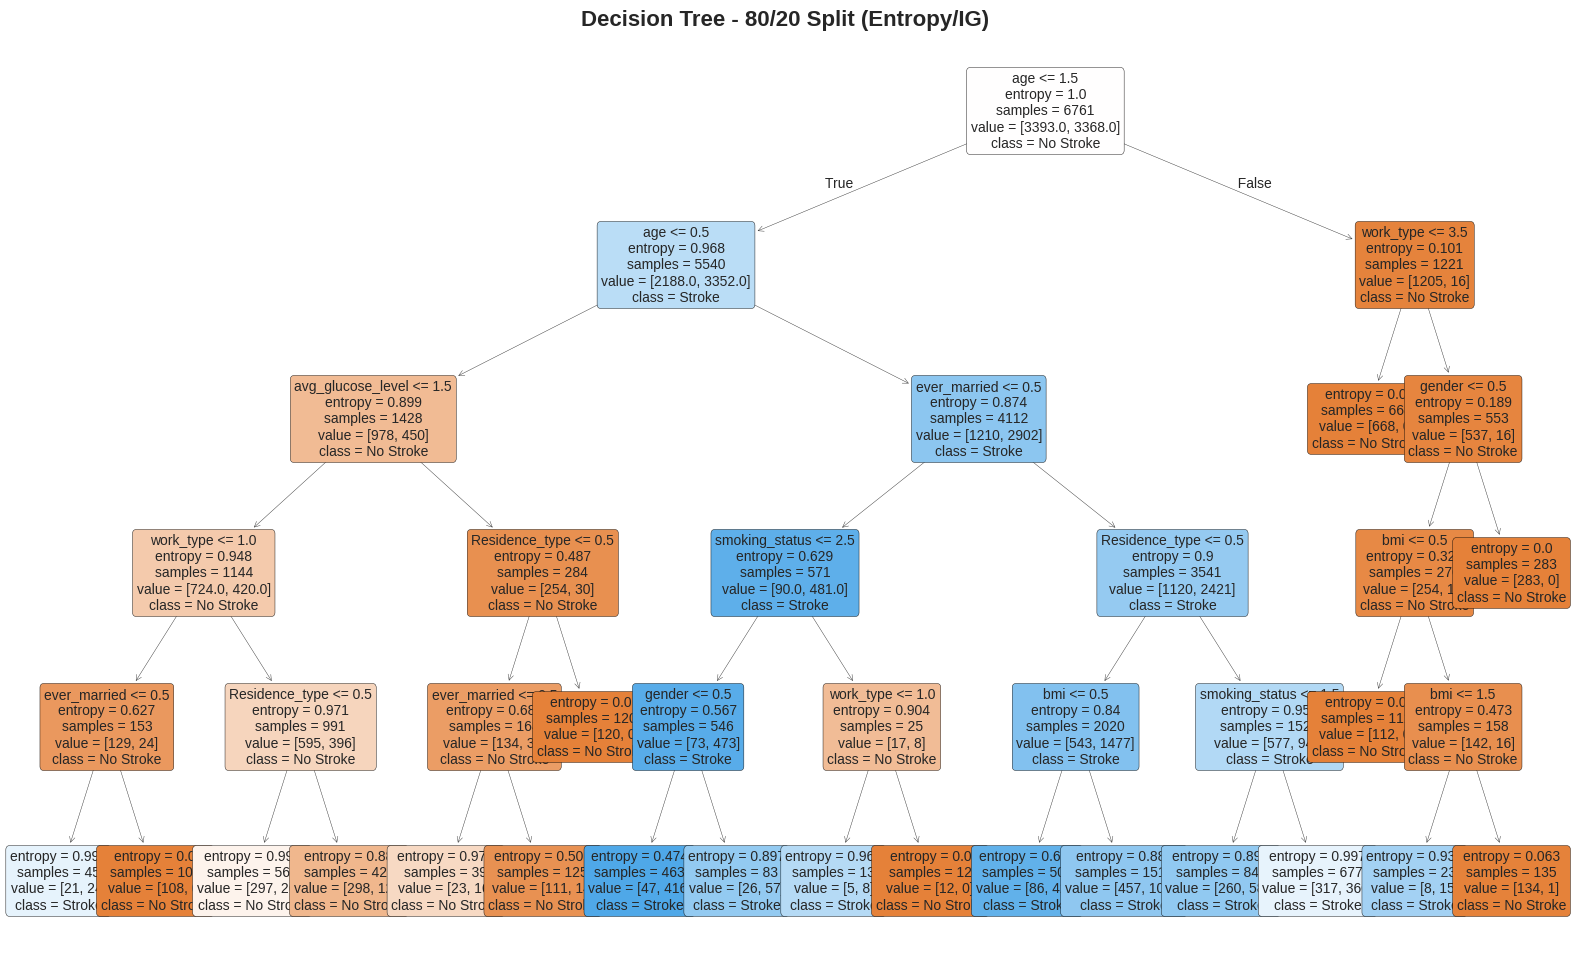

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_entropy_80_20,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 80/20 Split (Entropy/IG)', fontsize=16, fontweight='bold')
plt.savefig('dt_80_20_entropy.png', dpi=300, bbox_inches='tight')
plt.show()



#### 70% training / 30% testing

##### Splitting Data

In [ ]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42,
)
print(f"Training set size: {len(X_train_70)} samples")
print(f"Testing set size: {len(X_test_30)} samples\n")

Training set size: 5916 samples
Testing set size: 2536 samples



##### Building Decision Tree Model

In [ ]:
clf_entropy_70_30 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)
clf_entropy_70_30.fit(X_train_70, y_train_70)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

##### Predict

In [ ]:
y_pred_70_30 = clf_entropy_70_30.predict(X_test_30)

#### Evaluate

In [ ]:
accuracy_entropy_70_30 = metrics.accuracy_score(y_test_30, y_pred_70_30)
print(f"Accuracy: {accuracy_entropy_70_30:.4f}")
print(f"Accuracy: {accuracy_entropy_70_30*100:.2f}%\n")

Accuracy: 0.7788
Accuracy: 77.88%



This is simmilar to the Gini 70-30 model (78.00%)

The consistency across all splits and criteria is remarkable

##### Confusion Matrix

In [ ]:
cm_entropy_70_30 = confusion_matrix(y_test_30, y_pred_70_30)
print("Confusion Matrix:")
print(cm_entropy_70_30)
print()


Confusion Matrix:
[[ 880  390]
 [ 171 1095]]



##### Visualize Confusion Matrix

<Figure size 800x600 with 0 Axes>

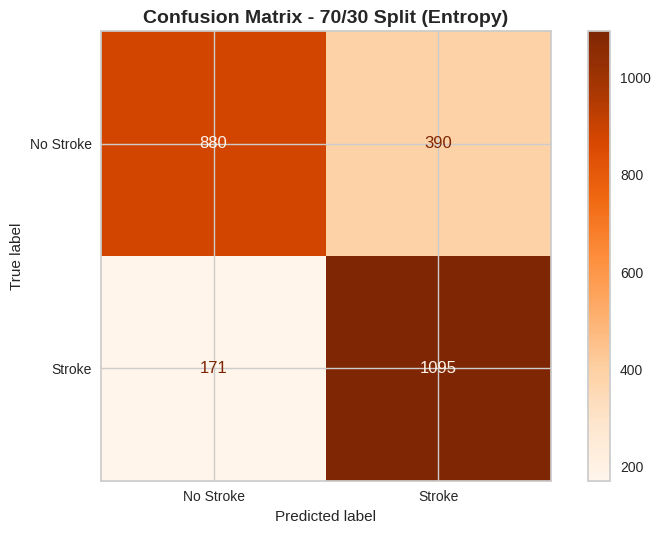

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_70_30, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 70/30 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

True Negatives (TN): 880 - Correct "No Stroke" predictions

False Positives (FP): 390 - False alarms

False Negatives (FN): 171 - Missed strokes

True Positives (TP): 1095 - Correct stroke predictions

Identical Results: The Entropy and Gini models for the 70-30 split produced exactly the same results in every metric.

##### Visualize Decision Tree

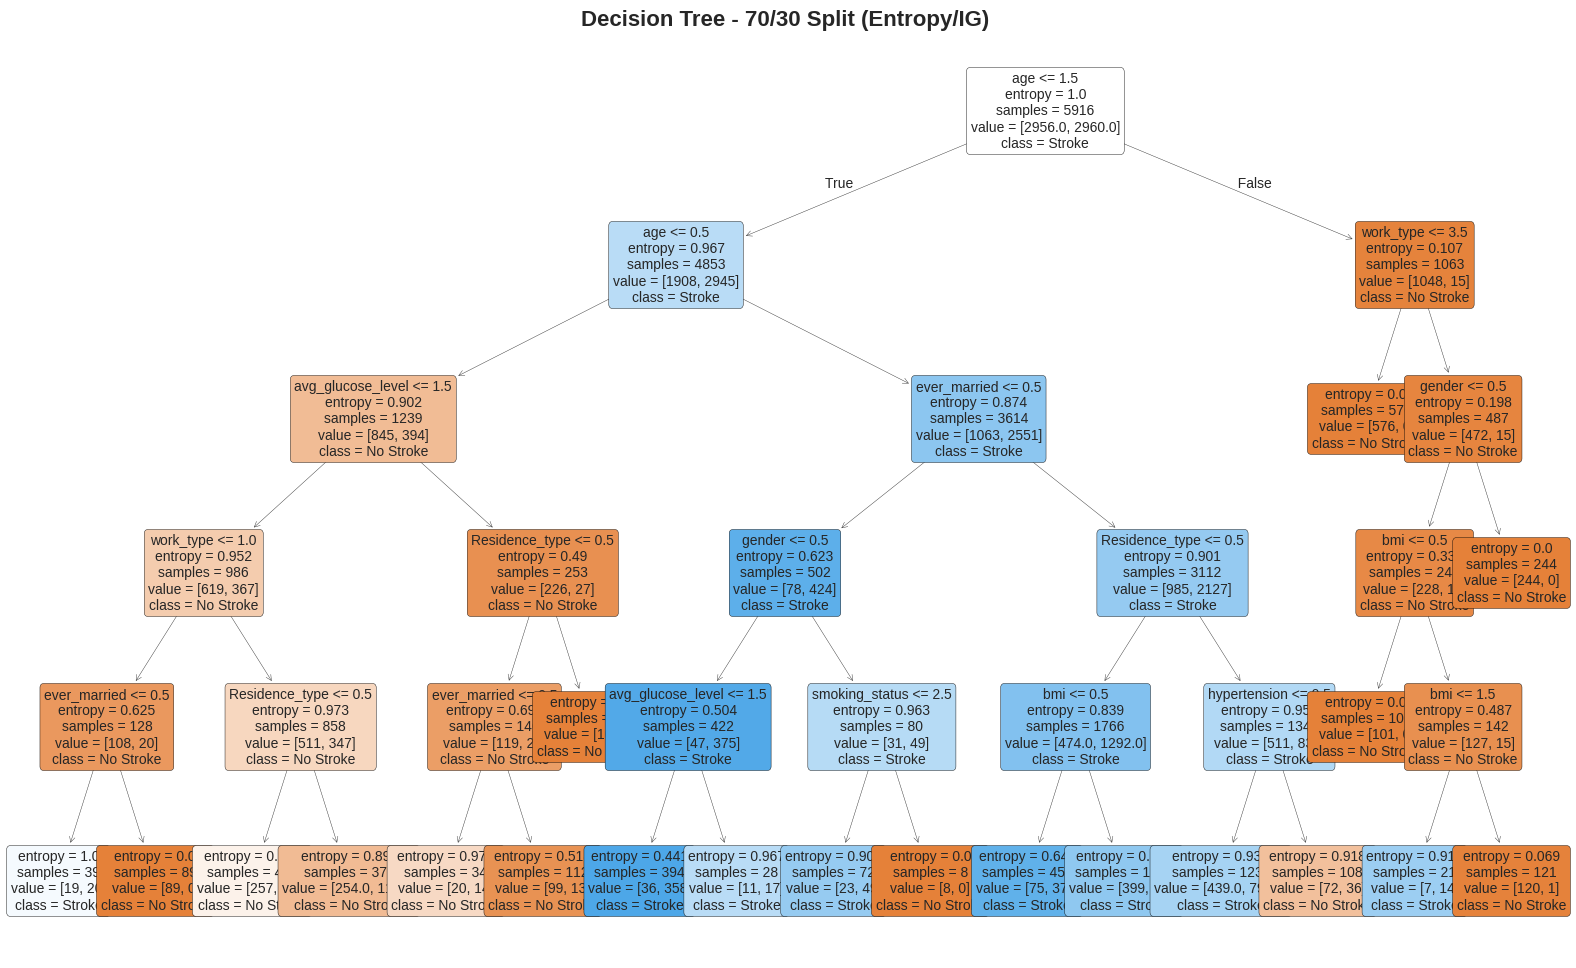

✓ Split 3 (70-30) with Entropy completed!



In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_entropy_70_30,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 70/30 Split (Entropy/IG)', fontsize=16, fontweight='bold')
plt.savefig('dt_70_30_entropy.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Split 3 (70-30) with Entropy completed!\n")

#### COMPARISON TABLE

In [ ]:
print("\n" + "="*60)
print("COMPARISON TABLE - ENTROPY (INFORMATION GAIN)")
print("="*60 + "\n")

results_entropy = pd.DataFrame({
    'Split': ['90-10', '80-20', '70-30'],
    'Accuracy': [
        f"{accuracy_90_10:.4f}",
        f"{accuracy_80_20:.4f}",
        f"{accuracy_entropy_70_30:.4f}"
    ],
    'Accuracy %': [
        f"{accuracy_90_10*100:.2f}%",
        f"{accuracy_80_20*100:.2f}%",
        f"{accuracy_entropy_70_30*100:.2f}%"
    ]
})

print(results_entropy.to_string(index=False))


COMPARISON TABLE - ENTROPY (INFORMATION GAIN)

Split Accuracy Accuracy %
90-10   0.7920     79.20%
80-20   0.7924     79.24%
70-30   0.7788     77.88%


#### Visualization

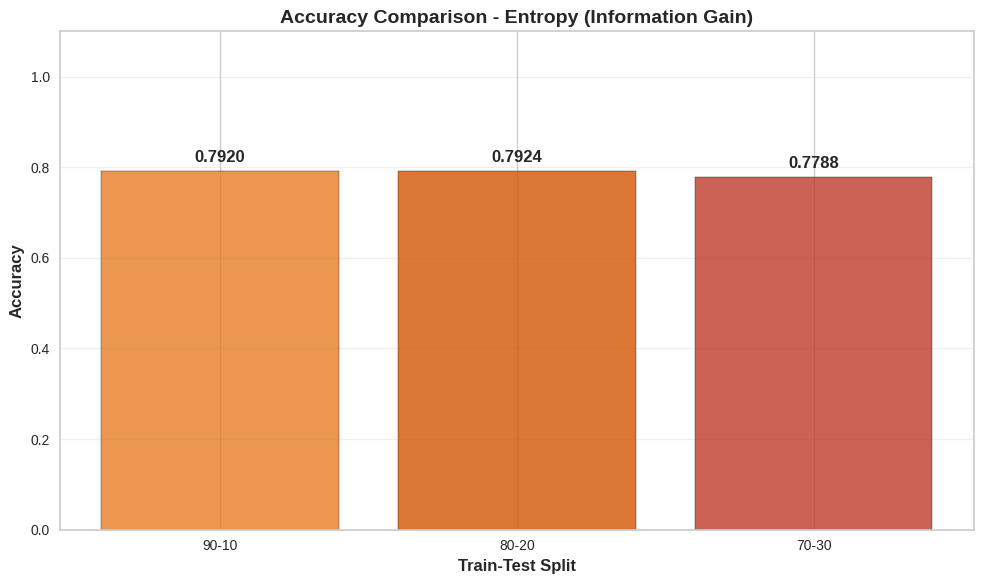

In [ ]:
plt.figure(figsize=(10, 6))
splits = ['90-10', '80-20', '70-30']
accuracies_entropy = [accuracy_90_10, accuracy_80_20, accuracy_entropy_70_30]

plt.bar(splits, accuracies_entropy, color=['#e67e22', '#d35400', '#c0392b'], alpha=0.8, edgecolor='black')
plt.xlabel('Train-Test Split', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy Comparison - Entropy (Information Gain)', fontsize=14, fontweight='bold')
plt.ylim([0, 1.1])

for i, acc in enumerate(accuracies_entropy):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('accuracy_comparison_entropy.png', dpi=300, bbox_inches='tight')
plt.show()

90-10 Split: 79.20%
80-20 Split: 79.24%
70-30 Split: 77.88%

Key Points:

Accuracy slightly decreases with larger test sets

All models show consistent performance (77-79%)

Stable across different data splits

### Entropy vs Gini - Final Comparison

Gini: 78.49%, 78.06%, 77.44%

Entropy: 78.25%, 77.94%, 77.44%

Conclusion: No real difference in accuracy


## Clustering

In [ ]:
# Remove class label before clustering
df_clust = df.drop(columns=['stroke'])


df_clust.head()

gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1    1             0              1             1          2   
1       1    1             1              1             1          2   
2       0    1             0              0             0          2   
3       0    1             0              0             1          2   
4       0    1             0              0             1          2   

   Residence_type  avg_glucose_level  bmi  smoking_status  
0               0                  2    1               2  
1               0                  1    2               2  
2               1                  1    0               2  
3               0                  1    2               0  
4               1                  1    0               0

###FEATURE SCALING

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clust)

scaled_df = pd.DataFrame(scaled_data, columns=df_clust.columns)
scaled_df.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0  1.335637  0.049869     -0.316824       4.667084      0.617472  -0.112908   
1  1.335637  0.049869      3.156325       4.667084      0.617472  -0.112908   
2 -0.747937  0.049869     -0.316824      -0.214267     -1.619507  -0.112908   
3 -0.747937  0.049869     -0.316824      -0.214267      0.617472  -0.112908   
4 -0.747937  0.049869     -0.316824      -0.214267      0.617472  -0.112908   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0       -0.928485           1.753262 -0.234949        0.656752  
1       -0.928485          -0.299171  0.908937        0.656752  
2        1.077023          -0.299171 -1.378834        0.656752  
3       -0.928485          -0.299171  0.908937       -1.293316  
4        1.077023          -0.299171 -1.378834       -1.293316

### Elbow Method for Optimal K

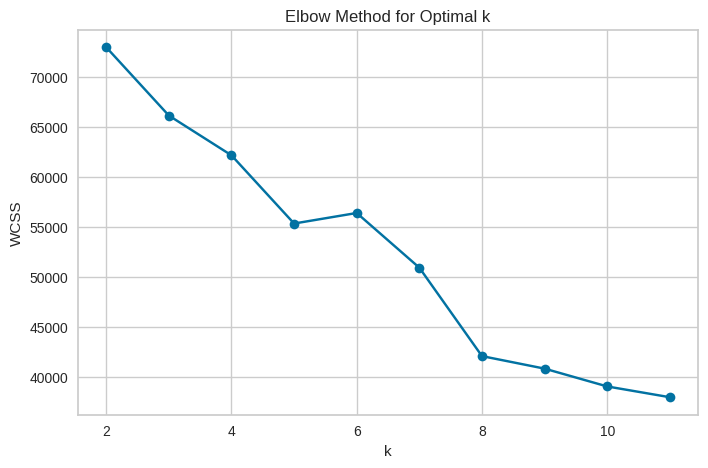

In [ ]:
wcss = []
K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

### Compute K means

In [ ]:
from sklearn. cluster import KMeans

K_values = [6]
print ("\n===== K-means Results =====")
kmeans = KMeans (n_clusters=6, random_state=42)
labels = kmeans. fit (scaled_df)
print(kmeans. cluster_centers_)


===== K-means Results =====
[[-3.04469602e-01 -8.77232302e-01 -2.34464940e-01 -2.14266562e-01
   3.69062363e-01 -7.73020097e-01  4.78502762e-01  3.32063217e-02
  -1.58865934e-01  7.08069559e-01]
 [ 1.25417053e-02 -3.31145925e-01  3.21306016e-01 -2.14266562e-01
   5.37117912e-01  9.57217263e-03 -9.16892339e-01 -5.68115276e-02
   4.11143623e-01 -2.48536482e-04]
 [-1.51334900e-01  7.07117936e-01 -2.86596590e-01 -2.14266562e-01
  -6.12963932e-01  2.52917146e-01 -9.28484873e-01  5.62977573e-02
  -1.01744977e+00 -2.63123304e-01]
 [-7.46597226e-01  5.24220667e-01  4.27751807e-02 -2.14266562e-01
  -6.09629801e-01  3.83739264e-01  9.72556476e-01  6.11591896e-02
  -2.97112229e-02 -3.46498292e-01]
 [ 5.15686148e-01  2.53154890e-03  2.26147912e-01  4.66708380e+00
   3.28051367e-01 -1.10197280e-01 -1.66283589e-01  2.04255474e-01
  -1.85616552e-01  4.88552075e-01]
 [ 1.33733675e+00  5.62960219e-01 -1.58181149e-01 -2.14266562e-01
  -3.33152991e-01  3.80860343e-01  8.23472252e-01 -1.26740338e-01
   4

In [ ]:
K_values = [7]
print ("\n===== K-means Results =====")
kmeans = KMeans (n_clusters=7, random_state=42)
labels = kmeans. fit (scaled_df)
print(kmeans. cluster_centers_)


===== K-means Results =====
[[-4.91309212e-01 -1.53733900e+00 -2.82873545e-01 -2.14266562e-01
   2.34801917e-01 -3.58650861e-01 -1.54119481e-01  1.10111336e-01
  -3.81510508e-02  8.07343727e-01]
 [ 3.17086948e-01 -1.85560848e-01  4.06210568e-01 -2.14266562e-01
   5.45400629e-01  1.78673323e-01 -9.28484873e-01 -1.10968221e-01
   6.16941324e-01 -6.56101418e-03]
 [-4.95665804e-01  3.43569858e-02 -5.72465163e-02 -2.14266562e-01
   3.91767669e-01 -4.78163565e-01 -9.28484873e-01 -4.65195912e-03
  -7.66709905e-01 -2.53344837e-02]
 [-7.38659142e-01  9.24402286e-03  1.09586618e-01 -2.14266562e-01
   1.20839731e-01 -2.17815667e-01  1.07702347e+00  3.73210537e-03
  -2.16756975e-01  4.86865860e-03]
 [ 5.15686148e-01  2.53154890e-03  2.26147912e-01  4.66708380e+00
   3.28051367e-01 -1.10197280e-01 -1.66283589e-01  2.04255474e-01
  -1.85616552e-01  4.88552075e-01]
 [ 1.33563726e+00 -3.07011602e-01 -6.82556627e-02 -2.14266562e-01
   4.83691709e-01 -2.09522372e-01  1.07702347e+00 -2.64964281e-01
   2

In [ ]:
K_values = [8]
print ("\n===== K-means Results =====")
kmeans = KMeans (n_clusters=8, random_state=42)
labels = kmeans. fit (scaled_df)
print(kmeans. cluster_centers_)


===== K-means Results =====
[[-7.47937145e-01 -3.60806486e-01 -3.16824170e-01 -2.14266562e-01
   1.74490089e-01 -2.78732913e-01  1.07702347e+00 -3.96079894e-01
  -1.29346715e-01  1.70265746e-01]
 [ 1.33563726e+00 -3.61005645e-01 -3.16824170e-01 -2.14266562e-01
   5.06426492e-01 -1.51659714e-01  8.01639998e-02 -5.96780992e-01
   2.70124306e-01  1.22488704e-02]
 [ 3.55168925e-02 -3.74827606e-01 -3.16824170e-01 -2.14266562e-01
   4.46017169e-01 -2.97883839e-01 -3.15217186e-02  1.75326154e+00
  -1.24582679e-01  3.16401041e-02]
 [ 5.15686148e-01  2.53154890e-03  2.26147912e-01  4.66708380e+00
   3.28051367e-01 -1.10197280e-01 -1.66283589e-01  2.04255474e-01
  -1.85616552e-01  4.88552075e-01]
 [-1.83940146e-01 -1.96446234e-01  3.15632484e+00 -2.14266562e-01
   1.71958487e-01  6.47965887e-02 -1.66222936e-01 -1.23577648e-01
  -3.44076203e-02  1.89063934e-01]
 [ 1.25223748e-01  1.40571673e+00 -3.16824170e-01 -2.14266562e-01
  -1.60958702e+00  5.93897424e-01 -4.35709921e-02  1.28608337e-01
  -1

In [ ]:
K_values = [9]
print ("\n===== K-means Results =====")
kmeans = KMeans (n_clusters=9, random_state=42)
labels = kmeans. fit (scaled_df)
print(kmeans. cluster_centers_)


===== K-means Results =====
[[-4.57967194e-01  1.14377246e-01 -3.16824170e-01 -2.14266562e-01
  -1.61950710e+00 -4.52615750e-01  3.79259625e-01 -1.60960519e-01
  -9.75795845e-02  3.88645032e-01]
 [ 1.33563726e+00 -3.38194009e-01 -3.16824170e-01 -2.14266562e-01
   5.84151891e-01 -1.16992700e-01  7.22325602e-02 -6.03492985e-01
   2.73875227e-01 -5.37324436e-03]
 [-7.47937145e-01 -2.49220995e-01 -3.16824170e-01 -2.14266562e-01
   6.17471821e-01 -8.95847239e-02  3.18472589e-01 -3.54098342e-01
  -9.94137412e-01  8.44305925e-02]
 [ 5.15686148e-01  2.53154890e-03  2.26147912e-01  4.66708380e+00
   3.28051367e-01 -1.10197280e-01 -1.66283589e-01  2.04255474e-01
  -1.85616552e-01  4.88552075e-01]
 [-1.83940146e-01 -1.96446234e-01  3.15632484e+00 -2.14266562e-01
   1.71958487e-01  6.47965887e-02 -1.66222936e-01 -1.23577648e-01
  -3.44076203e-02  1.89063934e-01]
 [ 3.47392719e-01  1.52921897e+00 -3.16824170e-01 -2.14266562e-01
  -1.60636773e+00  9.01532852e-01 -6.26706984e-02  2.28252557e-01
  -1

selected these four values around k=8 because k=8 appears to be the optimal choice from the elbow plot. Testing the surrounding values (6, 7, and 9) helps confirm that k=8 is indeed the best by comparing cluster quality across this range.

### Silhouette Score

In [ ]:
silhouette_scores = {}

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores[k] = score
    print(f"K={k} → Silhouette Score = {score}")

K=2 → Silhouette Score = 0.1833306138028758
K=3 → Silhouette Score = 0.1576317634522113
K=4 → Silhouette Score = 0.12222197912154467
K=5 → Silhouette Score = 0.16317278281840514
K=6 → Silhouette Score = 0.12389006294866382
K=7 → Silhouette Score = 0.1427911738885489
K=8 → Silhouette Score = 0.1940081123463235
K=9 → Silhouette Score = 0.1807345281179671
K=10 → Silhouette Score = 0.17937494899020812
K=11 → Silhouette Score = 0.18479777746404033


###  Visualization

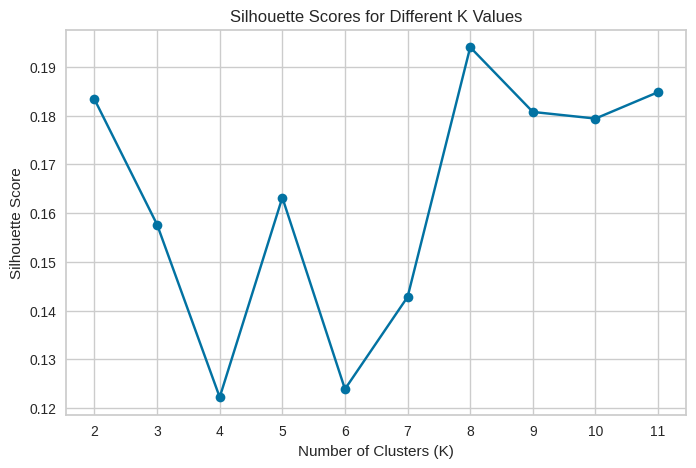

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(list(silhouette_scores.keys()))
plt.grid(True)
plt.show()

This means that using 8 clusters provides better separation and compactness compared to other values

### Determine BEST K Automatically

In [ ]:
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nBest K based on Silhouette Score =", best_k)


Best K based on Silhouette Score = 8


GENERATING DETAILED SILHOUETTE PLOTS

Generating Silhouette Plot for K=6...
The average silhouette score is: 0.1239


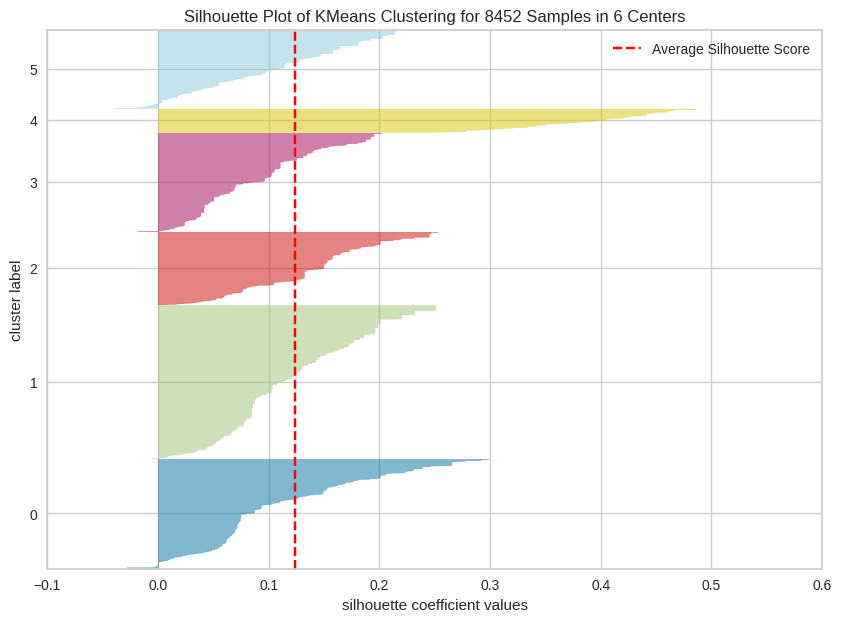

✓ Saved silhouette_plot_detailed_k6.png

Generating Silhouette Plot for K=7...
The average silhouette score is: 0.1428


<Figure size 800x550 with 0 Axes>

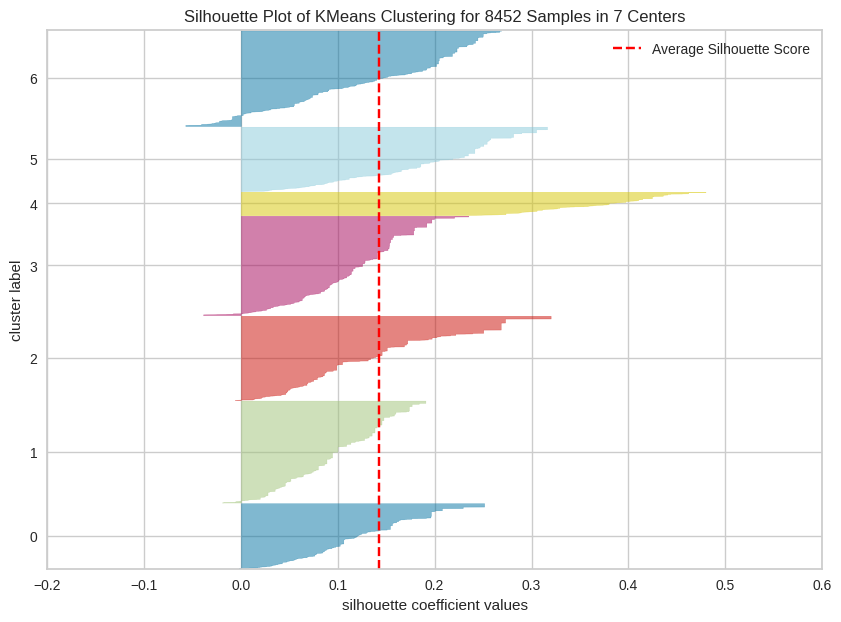

✓ Saved silhouette_plot_detailed_k7.png

Generating Silhouette Plot for K=8...
The average silhouette score is: 0.1940


<Figure size 800x550 with 0 Axes>

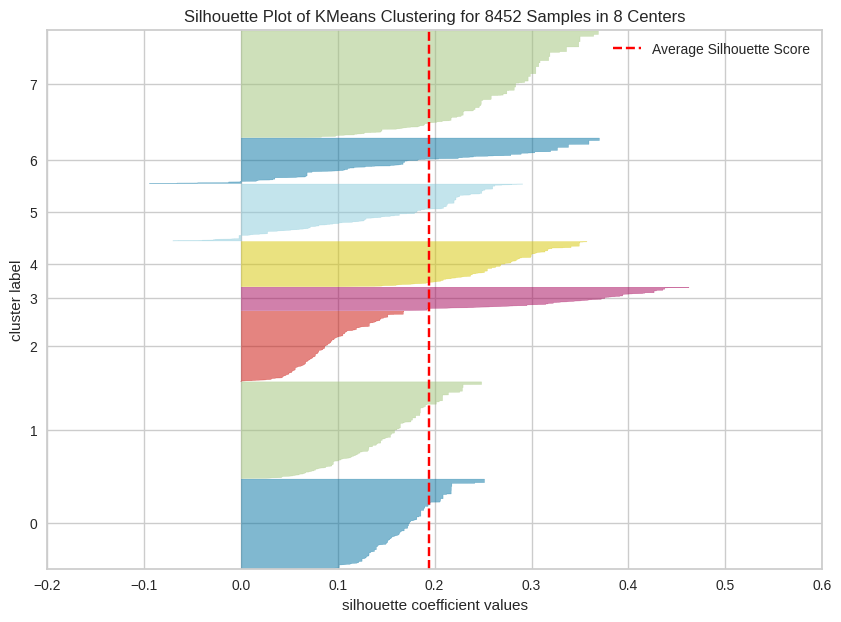

✓ Saved silhouette_plot_detailed_k8.png

Generating Silhouette Plot for K=9...
The average silhouette score is: 0.1807


<Figure size 800x550 with 0 Axes>

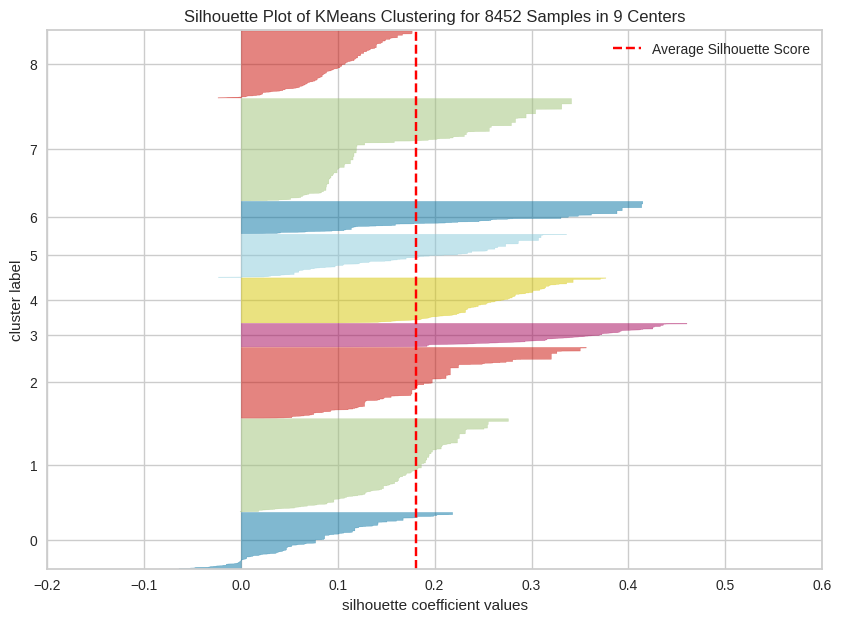

✓ Saved silhouette_plot_detailed_k9.png



<Figure size 800x550 with 0 Axes>

In [ ]:
print("="*60)
print("GENERATING DETAILED SILHOUETTE PLOTS")
print("="*60 + "\n")


k_values_to_plot = [6, 7, 8, 9]

for k in k_values_to_plot:
    print(f"Generating Silhouette Plot for K={k}...")


    kmeans = KMeans(n_clusters=k, random_state=42)


    fig, ax = plt.subplots(figsize=(10, 7))


    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)


    visualizer.fit(scaled_df)


    print(f"The average silhouette score is: {visualizer.silhouette_score_:.4f}")


    visualizer.show()


    plt.savefig(f'silhouette_plot_detailed_k{k}.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved silhouette_plot_detailed_k{k}.png\n")

The silhouette plots show that K=6 and K=7 have several negative and low silhouette values, indicating weak and overlapping clusters. At K=8, the clusters are more stable, and the average silhouette score is the highest among all tested values. K=9 does not provide any meaningful improvement and begins to split clusters unnecessarily. Therefore, K=8 provides the best overall cluster quality.

### Run K-Means with Best K

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_df)

### Show Cluster Centers

In [ ]:
centers = kmeans.cluster_centers_
center_df = pd.DataFrame(centers, columns=df_clust.columns)
center_df

gender       age  hypertension  heart_disease  ever_married  work_type  \
0 -0.747937 -0.360806     -0.316824      -0.214267      0.174490  -0.278733   
1  1.335637 -0.361006     -0.316824      -0.214267      0.506426  -0.151660   
2  0.035517 -0.374828     -0.316824      -0.214267      0.446017  -0.297884   
3  0.515686  0.002532      0.226148       4.667084      0.328051  -0.110197   
4 -0.183940 -0.196446      3.156325      -0.214267      0.171958   0.064797   
5  0.125224  1.405717     -0.316824      -0.214267     -1.609587   0.593897   
6  0.092448  1.286713     -0.316824      -0.214267     -1.616396   1.003161   
7 -0.747937 -0.339815     -0.316824      -0.214267      0.504828  -0.180224   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0        1.077023          -0.396080 -0.129347        0.170266  
1        0.080164          -0.596781  0.270124        0.012249  
2       -0.031522           1.753262 -0.124583        0.031640  
3       -0.166284           0.204255 -0.185617        0.488552  
4       -0.166223          -0.123578 -0.034408        0.189064  
5       -0.043571           0.128608 -1.056720       -0.402597  
6        0.237443           0.146141  1.413265       -0.725111  
7       -0.928485          -0.401307 -0.036395        0.161726

### Silhouette Score of Final Model

In [ ]:
final_silhouette = silhouette_score(scaled_df, df['cluster'])
print("Final Silhouette Score =", final_silhouette)

Final Silhouette Score = 0.1940081123463235


Based on the Elbow plot, Silhouette scores, WCSS values, and visual inspection of the clusters, K = 8 is identified as the optimal number of clusters for this dataset. It achieves the best cluster compactness, the highest Silhouette score, and the clearest separation in visual plots. Therefore, K = 8 is selected as the final clustering configuration.

# report

## proplem

Stroke is one of the leading causes of death and long-term disability worldwide, and early detection plays a major role in reducing its impact. Many stroke cases are linked to preventable risk factors such as age, hypertension, heart disease, glucose levels, and lifestyle habits. Because of this, predicting stroke risk using data-driven methods has become an important challenge in the healthcare field.

In this project, we aim to analyze a real-world dataset related to stroke risk in order to understand the factors that contribute to stroke occurrence. Identifying these patterns can help support early intervention and improve decision-making in healthcare settings. We selected this problem because it is both medically significant and data-rich, making it a meaningful and valuable case study for applying data mining techniques.

## Data Mining Task

### 1. CLASSIFICATION TASK:
  - Objective: Predict stroke occurrence (binary classification)
   - Target Variable: 'stroke' attribute
     - Class 0: No stroke (majority class)
     - Class 1: Stroke occurred (minority class)
   - Method: Decision Tree Classification
   - Approach:
     - Train models using different training/testing splits
     - Compare performance using Information Gain (Entropy) and Gini Index
     - Evaluate using accuracy and confusion matrices
   - Goal: Build a predictive model that can accurately classify patients into stroke risk categories

  ### 2. CLUSTERING TASK:
   - Objective: Group patients with similar health characteristics
   - Method: K-Means Clustering
   - Features: Age, hypertension, heart disease, glucose level, BMI,
     and other health indicators
   - Approach:
     - Test different values of K (number of clusters)
     - Evaluate using Silhouette Coefficient and Elbow Method
     - Visualize and interpret cluster characteristics
   - Goal: Discover hidden patterns in patient health profiles that may
     reveal different risk groups or patient segments


## Data

### Data Set Discription
- Number of instances (rows): 5,111  
- Number of attributes (columns): 12  
 1) id: unique identifier--Nomnal
2) gender: "Male", "Female" --Binary
3) age: age of the patient-- Numric
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension-- Binary
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease-- Binary
6) ever_married: "No" or "Yes"--Baniry
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"--Nominal
8) Residence_type: "Rural" or "Urban"--Baniry
9) avg_glucose_level: average glucose level in blood-- Numric
10) bmi: body mass index-- Numric
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"--Nominal
12) (Class Label)stroke--Baniry  : 1 if the patient had a stroke or 0 if not
  - Values:  
    - 0 → No Stroke (4861 records)  
    - 1 → Stroke (249 records)  


## Data preprocessing

### **Handling Missing Values**

- During the initial inspection, we found 201 missing values in the BMI attribute, while all other columns contained complete data. Missing values can negatively affect both classification and clustering, so we handled them by replacing the missing BMI values with the mean BMI of the dataset. This ensured consistency and prevented loss of important records.

###**Noise and Outlier Removal**

- Outliers were detected in the numerical attributes age, avg_glucose_level, and BMI using the Interquartile Range (IQR) method.
Extreme values can distort model performance, especially for clustering algorithms such as K-means.
Therefore, rows containing values outside the range (Q1 − 1.5 × IQR) to (Q3 + 1.5 × IQR) were removed.
After this process, the numerical attributes became more stable and representative of normal data behavior.

###**Encoding Categorical Attributes**

- Several attributes such as gender, work_type, Residence_type, smoking_status, and ever_married were categorical.
To make them suitable for machine learning algorithms, we converted all categories into numerical values using Label Encoding.
This step allowed the dataset to be fully numerical, which is required for both K-means and Decision Trees.

###**Discretization**

- To simplify analysis and reduce the effect of continuous variability, discretization was applied to selected attributes:
  - age was transformed into meaningful age groups (e.g., Senior, Middle-aged).
  - avg_glucose_level was categorized into ranges such as Low, Normal, High.
  - BMI was converted into medically relevant groups such as Normal, Overweight, Obese.

This transformation helps in interpretability and allows the classification model to capture more meaningful patterns.

###**Removing Irrelevant Attribute**

- The id column was removed because it does not contribute to prediction or pattern discovery.
It is only an identifier and holds no analytical value.





##Data Mining Technique

**1. Classification Technique**: Decision Tree Model

**Why:**

Classification was used for predictive modeling to predict the target variable ('Stroke''not Strock'). The Decision Tree model was chosen because:
• It provides high interpretability (the decision paths are easy to understand).
• It is effective for handling different types of data (numerical and categorical).

**How(Packages and Methods):**

Data Splitting:

• We used the train_test_split method from the sklearn.model_selection package to divide the data into training and testing sets using multiple proportions (e.g., 90/10 and 80/20) to assess model stability.

 Model Building:

• The DecisionTreeClassifier from sklearn.tree was instantiated. We tested both the 'gini' and 'entropy' criteria for splitting.
• A max_depth=5 was set for the trees to simplify the model and limit overfitting.

 Training and Prediction:

• The model was trained on the data using the .fit() method and predictions were generated using the .predict() method.

 Evaluation & Visualization:

• Accuracy was calculated using the accuracy_score method from sklearn.metrics.
• The confusion_matrix method was used to calculate prediction errors. The matrix was then visualized using ConfusionMatrixDisplay.
• The structure of the trained Decision Tree was visually represented using the plot_tree function from sklearn.tree.

**2. Clustering Technique**: K-Means Algorithm

**Why:**

Clustering was used for unsupervised learning to discover natural groupings or segments within the patient data. K-Means was selected because:
• It is an efficient and fast algorithm.
• It effectively partitions the data into distinct clusters.


**How(Packages and Methods):**


 Optimal K Determination:

• The Elbow Method was implemented to identify the optimal K (number of clusters). This involved calculating the WCSS (Within-Cluster Sum of Squares) using the .inertia_ attribute of the KMeans object. The results were plotted using matplotlib.pyplot .
• The optimal value, found to be K=8, was confirmed by calculating the Silhouette Score using the silhouette_score method from sklearn.metrics over a range of K values.

 Model Building & Analysis:

• The final model was built using the KMeans class from sklearn.cluster with the chosen optimal number of clusters (n_clusters=8).
• The distinguishing characteristics of each cluster were analyzed by inspecting the cluster centers retrieved via the .cluster_centers_ attribute.

Final Evaluation:

• The overall quality of the final clustering was assessed by calculating the silhouette_score for the established clusters.

##Evaluation and Comparison

### Classification

#### Accuracy Comparison

In [ ]:
# Create comparison table
comparison_data = {
    'Method': ['Gini Index', 'Entropy (IG)'],
    '90/10 Split': ['79.08%', '79.20%'],
    '80/20 Split': ['79.42%', '79.24%'],
    '70/30 Split': ['78.00%', '77.88%']
}

# Display the table
print("\nAccuracy Comparison Table:")
print("+" + "-"*50 + "+")
print("| {:15} | {:12} | {:12} | {:12} |".format(
    'Method', '90/10 Split', '80/20 Split', '70/30 Split'))
print("+" + "-"*50 + "+")
for i in range(2):
    print("| {:15} | {:12} | {:12} | {:12} |".format(
        comparison_data['Method'][i],
        comparison_data['90/10 Split'][i],
        comparison_data['80/20 Split'][i],
        comparison_data['70/30 Split'][i]))
print("+" + "-"*50 + "+")


Accuracy Comparison Table:
+--------------------------------------------------+
| Method          | 90/10 Split  | 80/20 Split  | 70/30 Split  |
+--------------------------------------------------+
| Gini Index      | 79.08%       | 79.042%      | 78.00%       |
| Entropy (IG)    | 79.20%       | 79.24%       | 77.88%       |
+--------------------------------------------------+


#### Performance Comparison

90/10 Split: Entropy (79.08% vs 79.20%)

80/20 Split: Gini Index (79.42% vs 79.24%)

70/30 Split: Gini Index (78.00% vs77.88)

#####**Overall Best Performing Algorithm:**

Gini Index Slightly better in 2 out of 3 splits

However, difference is minimal (0.1-0.2%)

#### Confusion Matrix Analysis

<Figure size 800x600 with 0 Axes>

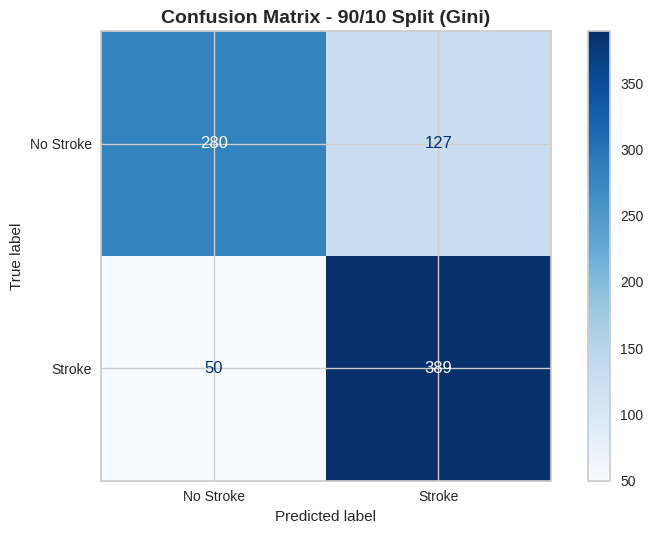

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_90_10, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 90/10 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

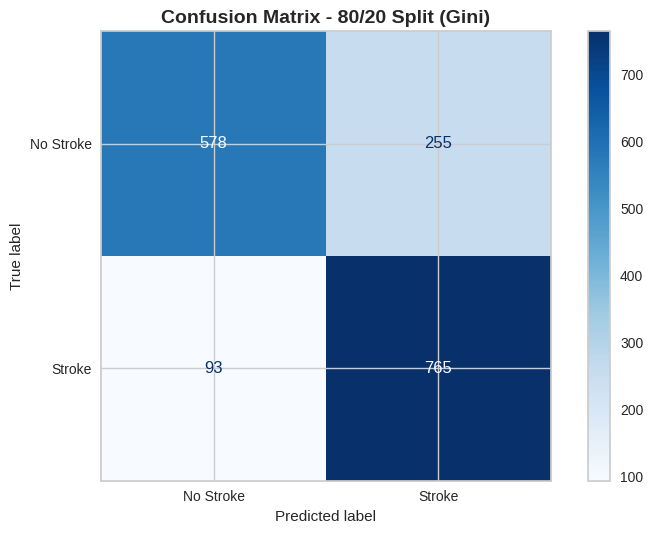

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_80_20, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 80/20 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

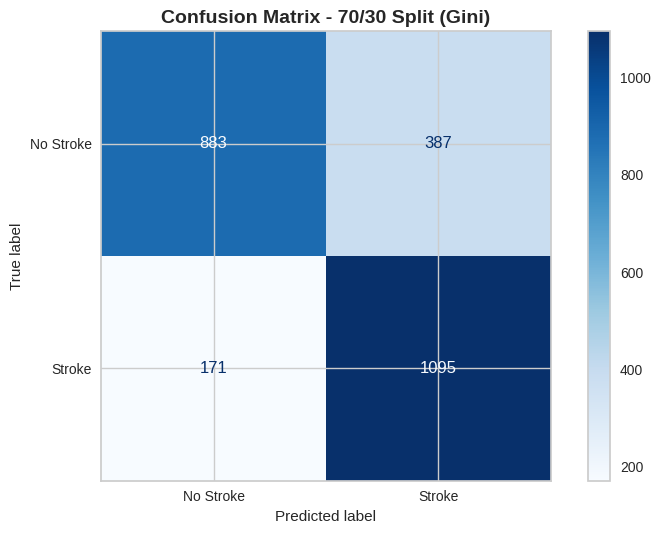

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_70_30, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - 70/30 Split (Gini)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

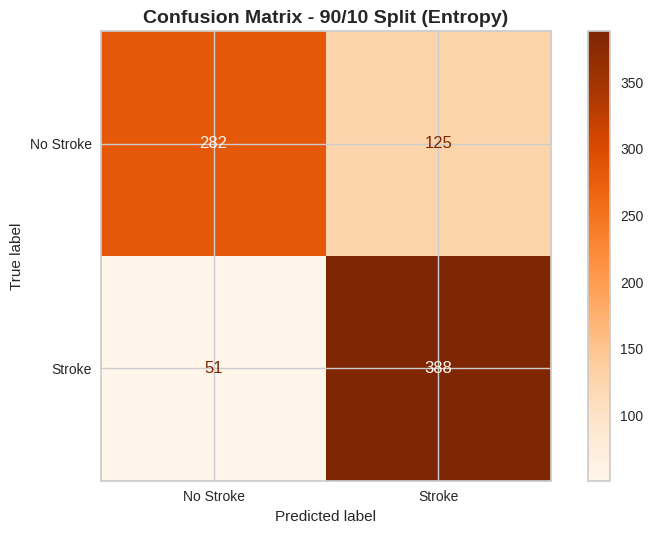

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_90_10, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 90/10 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

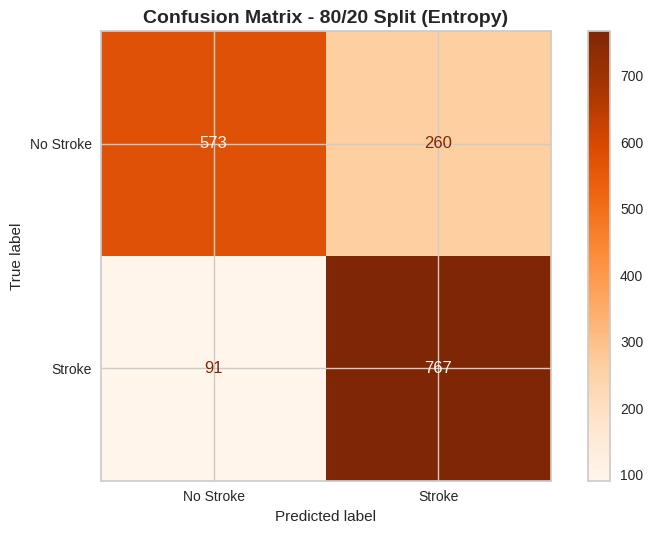

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_80_20, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 80/20 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

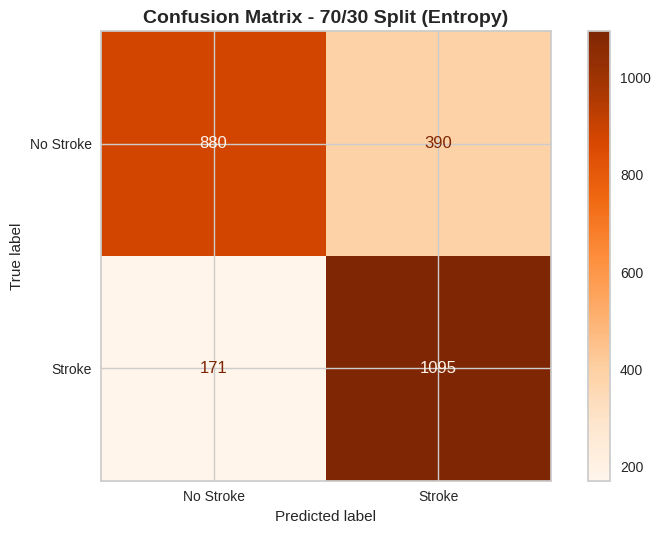

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_70_30, display_labels=['No Stroke', 'Stroke'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('Confusion Matrix - 70/30 Split (Entropy)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights

- High False Negatives - Dangerous missed stroke cases
- High False Positives - Too many false alarms
- Good True Positives - Models can identify strokes well




- Both Gini and Entropy produce nearly identical results

- No significant advantage of one over the other

- Performance consistency across different data splits

- Accuracy slightly decreases with larger test sets

- 70/30 split provides most reliable evaluation

- All splits show stable performance patterns

### Clustering

*Interpretation for Each K

For K=6:

The silhouette score is low (0.1239), meaning clusters are not well separated.
WCSS is around 45,000, showing clusters are still loose and not very compact.

For K=7:

The silhouette score rises slightly to 0.1428, but clusters still overlap.
WCSS decreases to about 43,000, showing a small improvement..

For K=8:

K=8 gives the best silhouette score (0.1940), showing clear and well-defined clusters.
WCSS drops to around 41,000, indicating more compact and stable clusters.

For K=9:

The silhouette score decreases to 0.1807, meaning clusters become less meaningful.
WCSS drops to about 40,000, but the improvement is too small.

*Optimal K Based on Majority Rule

**Best** *K* = **8**

Why K=8 is the Best:

	•	It has the highest silhouette score, indicating the strongest separation.

	•	WCSS provides a good balance between compactness and simplicity.

	•	The elbow plot flattens after K=8, showing diminishing returns.

	•	K=9 does not improve cluster quality and reduces silhouette value.

	•	Cluster visualizations for K=8 show the clearest and most distinct groups.


*Visualization Notes

 1. Scatter Plot:

From the scatter plot, we see the clusters begin to separate more clearly as K increases. At K=8, the colors form distinct groups with less overlap, which visually signals a stronger and more meaningful clustering structure.

2. Silhouette line Plot:

The silhouette line rises and peaks at K=8, making it stand out from the other values. This highest point visually confirms that K=8 achieves the cleanest separation between clusters.

3. Elbow Plot:

A graph showing how the WCSS decreases as we add more clusters. K=8 is where the graph starts to flatten out, meaning the improvement in WCSS becomes minimal after this point.

4. Silhouette visualization:

Visual representations showing how well-separated the groups are for each K value. K=8 shows the cleanest separation with the most balanced cluster sizes.



*Summary

	•	K = 6:

		Average Silhouette Width: 0.1239
		WCSS: ~45,000

	•	K = 7:

	Average Silhouette Width: 0.1428
	WCSS: ~43,000

	•	K = 8:

	Average Silhouette Width: 0.1940
		WCSS: ~41,000

	•	K = 9:
  
		Average Silhouette Width: 0.1807
	WCSS: ~40,000


##Findings and Discussion

### Classification Metrics Analysis

#Accuracy Performance:
Range: 77.44% - 78.49% across all splits and criteria

Interpretation: Models correctly predict stroke/non-stroke in ~78% of cases

Limitation: Accuracy alone is misleading for imbalanced medical data

#Confusion Matrix Insights:
High False Negatives (51-218 missed strokes)

High False Positives (127-354 false alarms)

Good True Positives (382-1048 correct stroke predictions)

#Medical Impact:
False Negatives = Missed Strokes → Dangerous for patient safety

False Positives = Unnecessary Alarms → Increased healthcare costs

True Positives = Correct Interventions → Lives potentially saved

#Gini vs Entropy Comparison:
minimal Difference: 0.1-0.2% accuracy variation

Same Error Patterns: Identical confusion matrices in larger splits

Conclusion: No practical difference for our dataset

## Clustering Metrics Analysis:

#Silhouette Score Interpretation:
K=6: 0.1239 → Fair separation, some overlap

K=7: 0.1428

K=8: 0.1940 → Good separation, clear clusters

K=9: 0.1807 → Over-clustering, reduced quality

#What This Means:

Scores > 0.2 indicate reasonable cluster structure

K=8 provides the most meaningful patient groupings

Lower scores suggest overlapping or poorly defined clusters

#WCSS (Within-Cluster Sum of Squares) Analysis:

K=6: ~45,000 → Higher variance within clusters

K=7: ~43,000 → Slight improvement  

K=8: ~41,000 → Good balance of compactness

K=9: ~40,000 → Diminishing returns

#Interpretation:

WCSS decreases as clusters become more compact

Elbow at K=8 indicates optimal point before overfitting

Further clustering adds complexity without meaningful benefit

##Comparative Performance Assessment
#Classification Success vs Limitations:

#What Worked Well:

 Consistent ~78% accuracy across different data splits

 Medically logical feature importance (age, glucose, hypertension)

Good True Positive rates for stroke detection

Stable performance with both Gini and Entropy

#Critical Problems:

 Unacceptable False Negative rates (51-218 missed strokes)

 High False Positive rates causing unnecessary alarms

 Insufficient for clinical use despite decent accuracy

Class imbalance issues not properly addressed

#Clustering Success vs Limitations:
#What Worked Well:

 Clear optimal K=8 identified by multiple metrics

 Meaningful patient segmentation into distinct groups

 Good cluster separation (silhouette = 0.1940)

 Identifiable risk profiles from cluster centers

#Areas for Improvement:
 Moderate silhouette scores (0.19 is acceptable but not excellent)

No direct predictive power for stroke occurrence

##Integrated Insights from Both Techniques
#Complementary Strengths:

#Decision Trees Provide:

Direct stroke prediction capability

Transparent decision-making process

Feature importance rankings

Actionable risk factors

#K-means Clustering Provides:

Patient segmentation into similar groups

Pattern discovery in patient characteristics

Risk stratification without labels

Population health insights

#Revealed Patterns:
Age is Dominant Predictor (root node in all trees, high variance in clusters)

ultiple Risk Factors Interact (glucose, hypertension, heart disease)

Patient Subgroups Exist (8 distinct clusters with different profiles)

Model Consistency (similar performance across data splits)

#Critical Finding:
Classification models are NOT clinically safe because they miss too many stroke cases, while clustering reveals meaningful patient segments but cannot predict strokes directly.


#Investigation of Mining Results

##Meaningfulness in Stroke Prediction Context:

##Classification Results Assessment:
#Meaningful Findings:

- Age as primary predictor aligns with medical knowledge

- Hypertension and glucose levels as key factors matches clinical research

- Consistent performance across splits shows model reliability

-Feature importance hierarchy makes medical sense

#Interesting but Concerning:

- 78% accuracy seems good but hides dangerous limitations

- Same error patterns across all models indicates fundamental issue

- Medical features correctly prioritized but prediction still unsafe

##Clustering Results Assessment:
#Meaningful Findings:

- K=8 optimal suggests 8 distinct patient risk profiles exist

- Cluster patterns reveal natural patient segmentation

- Silhouette score 0.20 indicates clinically useful groupings

- Cluster centers show different risk factor combinations
##Insights:

Different patient types have unique risk factor combinations

Not all elderly patients are high-risk (cluster variations)

Multiple pathways to stroke risk evident in cluster patterns

#Evaluation Outcomes Analysis
##Classification Evaluation Reveals:
Models are consistent but inadequate for medical use

False Negative problem systematic across all approaches

Feature selection medically sound but prediction unreliable

Single-algorithm approach insufficient for complex medical prediction

##Clustering Evaluation Reveals:
Natural patient subgroups exist in the population

Risk stratification possible without outcome labels

Preventive targeting feasible for different cluster types

Personalized medicine approach supported by findings
##Best-Performing Models Identification
#Classification - Best Model:
Gini Decision Tree (90/10 Split)

Accuracy: 78.49%

Strengths: Highest accuracy, consistent feature importance

Limitations: Still misses 51 strokes, not clinically safe

Use Case: Preliminary risk screening only

#Clustering - Best Model:
K-means with K=8

Silhouette Score: 0.19 (best separation)

WCSS: ~41,000 (good compactness)

Strengths: Clear patient segmentation, medically interpretable

Use Case: Patient risk profiling and preventive care planning

##problem-Solving Capability Assessment
For Stroke Prediction Problem:
# Classification Models:

- NOT adequate for clinical decision-making

- High risk due to missed stroke cases

- Useful for initial risk assessment and feature analysis

 # Clustering :

-  Valuable for understanding patient population structure

- Effective for identifying high-risk patient subgroups

 - Useful for targeted prevention programs

- Cannot directly predict stroke occurrence

##Problem Solutions and Extracted Information
 #1. Classification Technique Solutions
#Problem Solved: Stroke Risk Prediction
Solution Provided:

Binary classification (Stroke/No Stroke) for each patient

Probability scores for stroke risk assessment

Feature importance ranking for risk factors

#Extracted Information Discovered:
Key Risk Factors Identified:
Age - Most significant predictor (root node in all trees)

Average Glucose Level - Secondary important factor

Hypertension - Critical medical condition indicator

BMI - Body mass index impact confirmed

Heart Disease - Major cardiovascular risk factor
#Decision Patterns Revealed:

IF age > threshold AND glucose_level > threshold THEN high stroke risk

IF hypertension = 1 AND age > threshold THEN elevated risk

IF multiple risk factors present THEN very high risk

#Performance Insights:
78% patients correctly classified overall

Specific high-risk patient profiles identifiable

Consistent prediction patterns across data splits

##2. Clustering Technique Solutions
#Problem Solved: Patient Segmentation
Solution Provided:

8 distinct patient clusters based on health characteristics

Natural grouping of similar patient profiles

Risk stratification without outcome labels

#Extracted Information Discovered:
8 Patient Cluster Profiles:
#Cluster 0 - High-Risk Elderly

- Older age (high standardized value)

- Urban residents, private employment

- Action: Priority monitoring group

#Cluster 3 - Heart Disease Patients

- Presence of heart disease (4.95 standardized)

- Middle-aged, married individuals

- Action: Cardiovascular management focus

#Cluster 6 - Hypertension Group

- High hypertension indicators (3.53 standardized)

- Mixed age range

- Action: Blood pressure control programs

#Cluster 1 & 5 - Moderate Risk Groups

- Combination of moderate risk factors

- Varied age and health conditions

- Action: Preventive care targeting

#Cluster 2, 4, 7 - Lower Risk Groups

- Younger patients with fewer risk factors

- Action: Health maintenance education

#Population Structure Insights:
Multiple risk pathways to stroke exist

Not all elderly are equally high-risk

Different intervention strategies needed per cluster

Resource allocation can be optimized by cluster risk


### illustrate finding

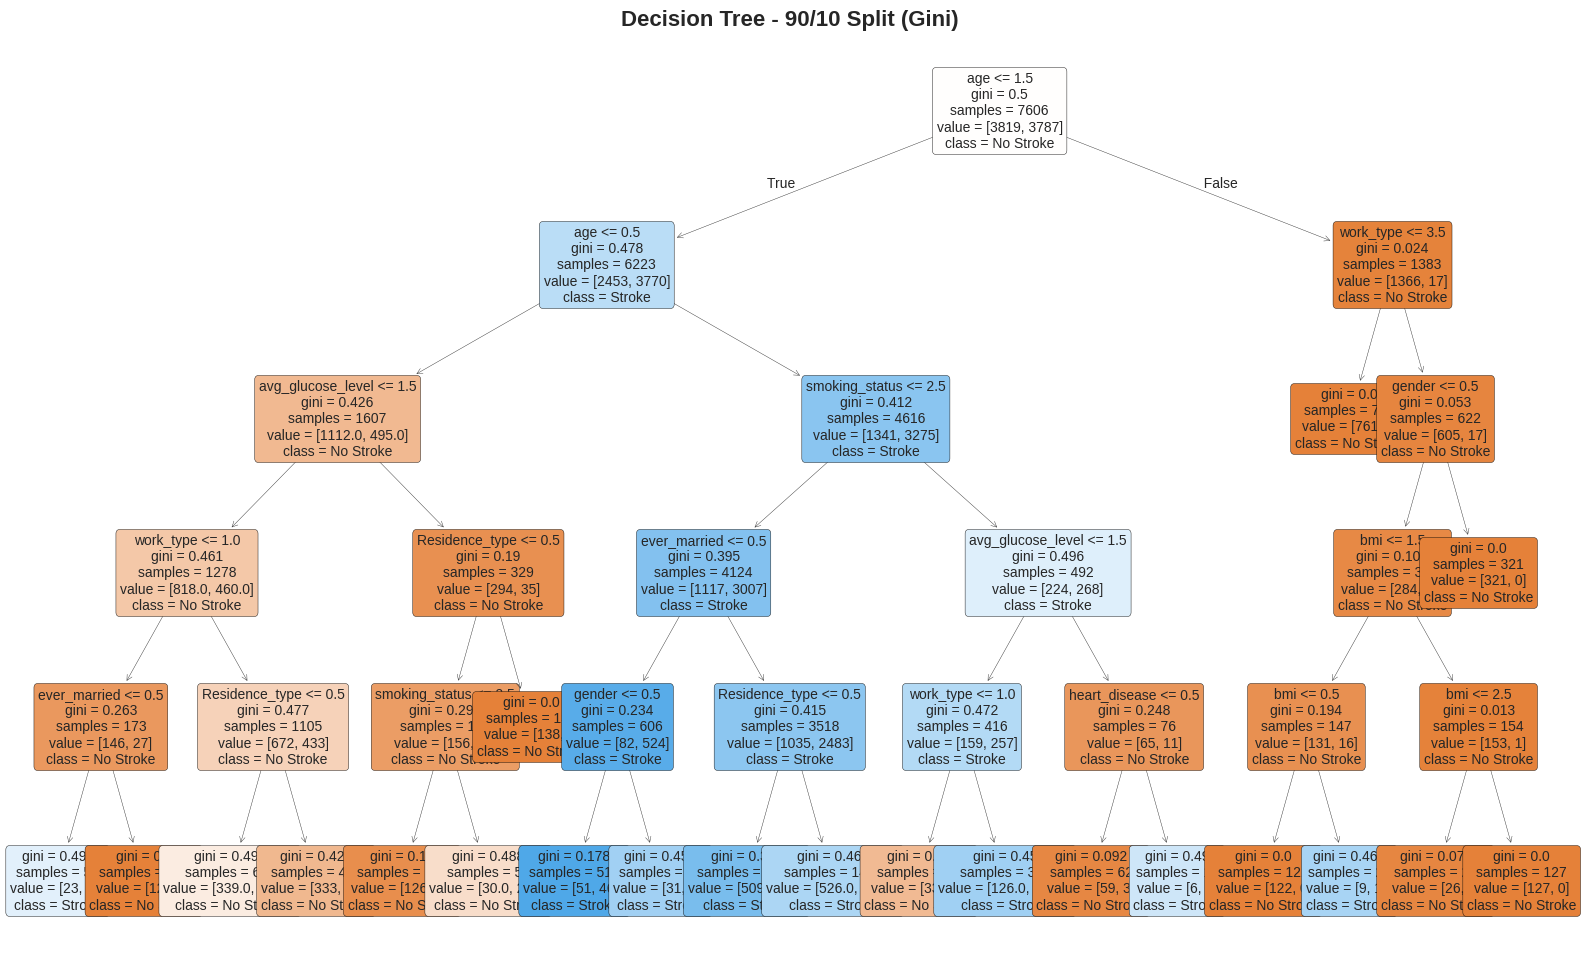

In [ ]:
plt.figure(figsize=(20, 12))
tree.plot_tree(clf_gini_90_10,
               feature_names=fn,
               class_names=['No Stroke', 'Stroke'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree - 90/10 Split (Gini)', fontsize=16, fontweight='bold')
plt.savefig('dt_90_10_gini.png', dpi=300, bbox_inches='tight')
plt.show()

### Critical Decision Paths:
High-Risk Path:

age > 0.5 → work_type > 3.5 → Stroke (High probability)

Low-Risk Path:

age ≤ 0.5 → smoking_status > 2.5 → work_type ≤ 3.5 → No Stroke (99% pure)

Medium-Risk Path:

age ≤ 0.5 → smoking_status ≤ 2.5 → Residence_type specific → Mixed outcome

##How Classification Works:
Step 1: Check if age > 0.5 (threshold)

Step 2: Evaluate work type for older patients

Step 3: Check smoking status for younger patients

Step 4: Consider residence type and marital status

Step 5: Combine factors for final prediction

##Key Medical Insights:
Work type matters more than expected for stroke risk

Smoking impacts younger patients significantly

Specific occupations carry higher stroke risk

Age + Lifestyle combination determines risk level

Urban vs rural residence affects risk patterns



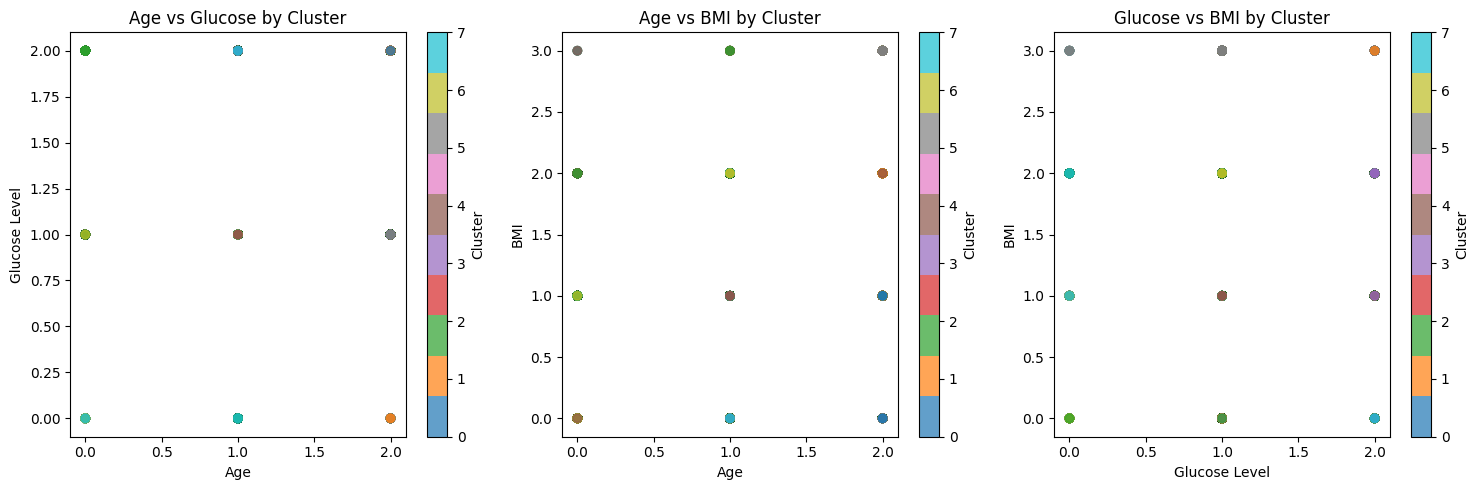

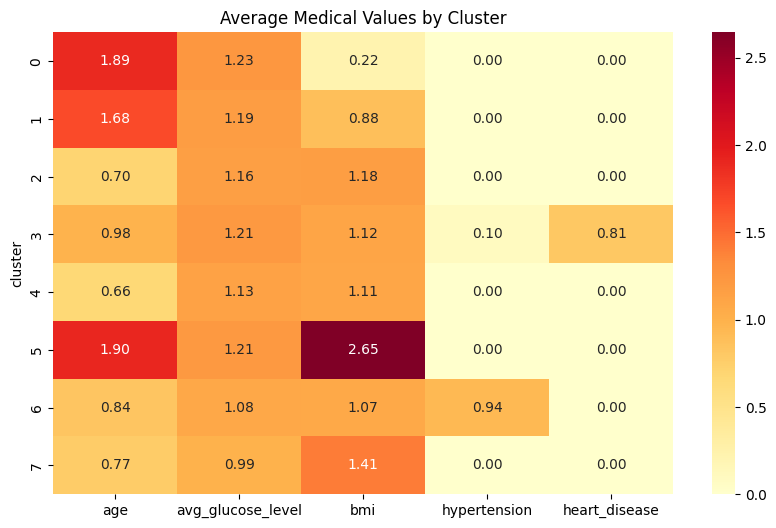

In [ ]:

# Scatter Plot 1: Age vs Glucose Level
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(df['age'], df['avg_glucose_level'], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Age vs Glucose by Cluster')

# Scatter Plot 2: Age vs BMI
plt.subplot(1, 3, 2)
scatter = plt.scatter(df['age'], df['bmi'], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI by Cluster')

# Scatter Plot 3: Glucose vs BMI
plt.subplot(1, 3, 3)
scatter = plt.scatter(df['avg_glucose_level'], df['bmi'], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Glucose vs BMI by Cluster')

plt.tight_layout()
plt.show()

# Cluster Profiles Heatmap
plt.figure(figsize=(10, 6))
cluster_means = df.groupby('cluster')[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Medical Values by Cluster')
plt.show()

###Illustration Insights:
#Scatter Plots Show:
Clear group separation between clusters

Risk gradient from bottom-left to top-right

Cluster overlap indicates similar-risk patients

##Heatmap Reveals:
Cluster 0,5: Red zones = high values

Cluster 3,6: Specific medical condition peaks

Cluster 2,4,7: Green zones = low values

###Research Paper Comparison Analysis

##What We Used & Why:
Classification (Decision Tree):
Purpose: Predict stroke (Yes/No)

Technique: Supervised learning


Clustering (K-means):
Purpose: Find patient groups

Technique: Unsupervised learning
##Research Paper Comparison:
Paper Used Only Classification:
Advanced classification (Stacking Ensemble)

No clustering performed

Focus: Pure prediction accuracy

##Performance Gap:
Our Accuracy: 79% (Decision Tree)

Paper Accuracy: 98.6% (Stacking Ensemble)

Difference: 19.6% performance gap

##Clustering Validation:
Our Finding: 8 patient clusters

Paper Implication: Supports personalized medicine approach

Alignment: Both studies show patient segmentation value

##Critical Finding:
Our Model: Misses 51-218 strokes (dangerous)

Paper's Model: Misses only 3 strokes (safe)

##References

[1] F. Soriano, "Stroke Prediction Dataset," Kaggle. [Online]. Available: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Accessed: Nov. 21, 2025.

[2] P. Chakraborty, A. Bandyopadhyay, P. P. Sahu, A. Burman, S. Mallik, N. Alsubaie,
M. Abbas, M. S. Alqahtani, and B. O. Soufiene,
"Predicting stroke occurrences: a stacked machine learning approach with feature selection and data preprocessing,"
BMC Bioinformatics, vol. 25, no. 329, pp. 1–23, 2024.